<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import csv

plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_filepath = '../sat_scores.csv'

In [3]:
with open(sat_filepath, 'r') as f:
    rows = [row for row in csv.reader(f)]
    header = rows[0]
    data = rows[1:]
    sat = {header[i]:[(row[i]) if row[i].isdigit() else row[i] for row in data] for i in range(len(header))}

In [4]:
from pprint import pprint
print(header)
pprint(sat['Rate'][:5])

['State', 'Rate', 'Verbal', 'Math']
['82', '81', '79', '77', '72']


### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
csv_sat = pd.DataFrame(sat)
sat = pd.read_csv(sat_filepath)

print(csv_sat.dtypes)
print(sat.dtypes)

# A:
# Unless you convert the numeric columns when reading them in the csv module, they are interpreted as strings.
# and when putting them  into a dataframe, pandas interprets them
# as object type. This is shown by the datatypes below:

Math      object
Rate      object
State     object
Verbal    object
dtype: object
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [6]:
sat.head(10)

# We have states and their test metrics:
# Rate (percent of students that take the SAT)
# Verbal (average verbal score)
# Math (average math score)

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501

**THOSE OF YOU THAT ARE CAREFUL MAY HAVE NOTICED THE FINAL ROW IS NOT A STATE!**

The last row has the averages for "All", across the different states. I'm going to remove this and put it in its own DataFrame, otherwise I'm including a non-state in the visualizations below!

If you missed this – don't worry, but keep this in mind for the future. Rigorous investigation is necessary when loading and cleaning data.

In [7]:
print(sat.tail(3))

   State  Rate  Verbal  Math
49    ND     4     592   599
50    MS     4     566   551
51   All    45     506   514


In [8]:
all_avg = sat[sat.State == 'All']
sat = sat[sat.State != 'All']

print(all_avg.shape)
print(len(sat.State.unique()))
print(sat.State.unique())

(1, 4)
51
['CT' 'NJ' 'MA' 'NY' 'NH' 'RI' 'PA' 'VT' 'ME' 'VA' 'DE' 'MD' 'NC' 'GA'
 'IN' 'SC' 'DC' 'OR' 'FL' 'WA' 'TX' 'HI' 'AK' 'CA' 'AZ' 'NV' 'CO' 'OH'
 'MT' 'WV' 'ID' 'TN' 'NM' 'IL' 'KY' 'WY' 'MI' 'MN' 'KS' 'AL' 'NE' 'OK'
 'MO' 'LA' 'WI' 'AR' 'UT' 'IA' 'SD' 'ND' 'MS']


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [9]:
data_dict = {
    'State':{
        'type':sat.State.dtype,
        'description':'State id.'
    },
    'Rate':{
        'type':sat.Rate.dtype,
        'description':'Percent of students that took SAT.'
    },
    'Math':{
        'type':sat.Math.dtype,
        'description':'Average math scores on SAT.'
    },
    'Verbal':{
        'type':sat.Verbal.dtype,
        'description':'Average verbal scores on SAT.'
    },
    'dataset_shape':sat.shape
}

pprint(data_dict)

{'Math': {'description': 'Average math scores on SAT.', 'type': dtype('int64')},
 'Rate': {'description': 'Percent of students that took SAT.',
          'type': dtype('int64')},
 'State': {'description': 'State id.', 'type': dtype('O')},
 'Verbal': {'description': 'Average verbal scores on SAT.',
            'type': dtype('int64')},
 'dataset_shape': (51, 4)}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

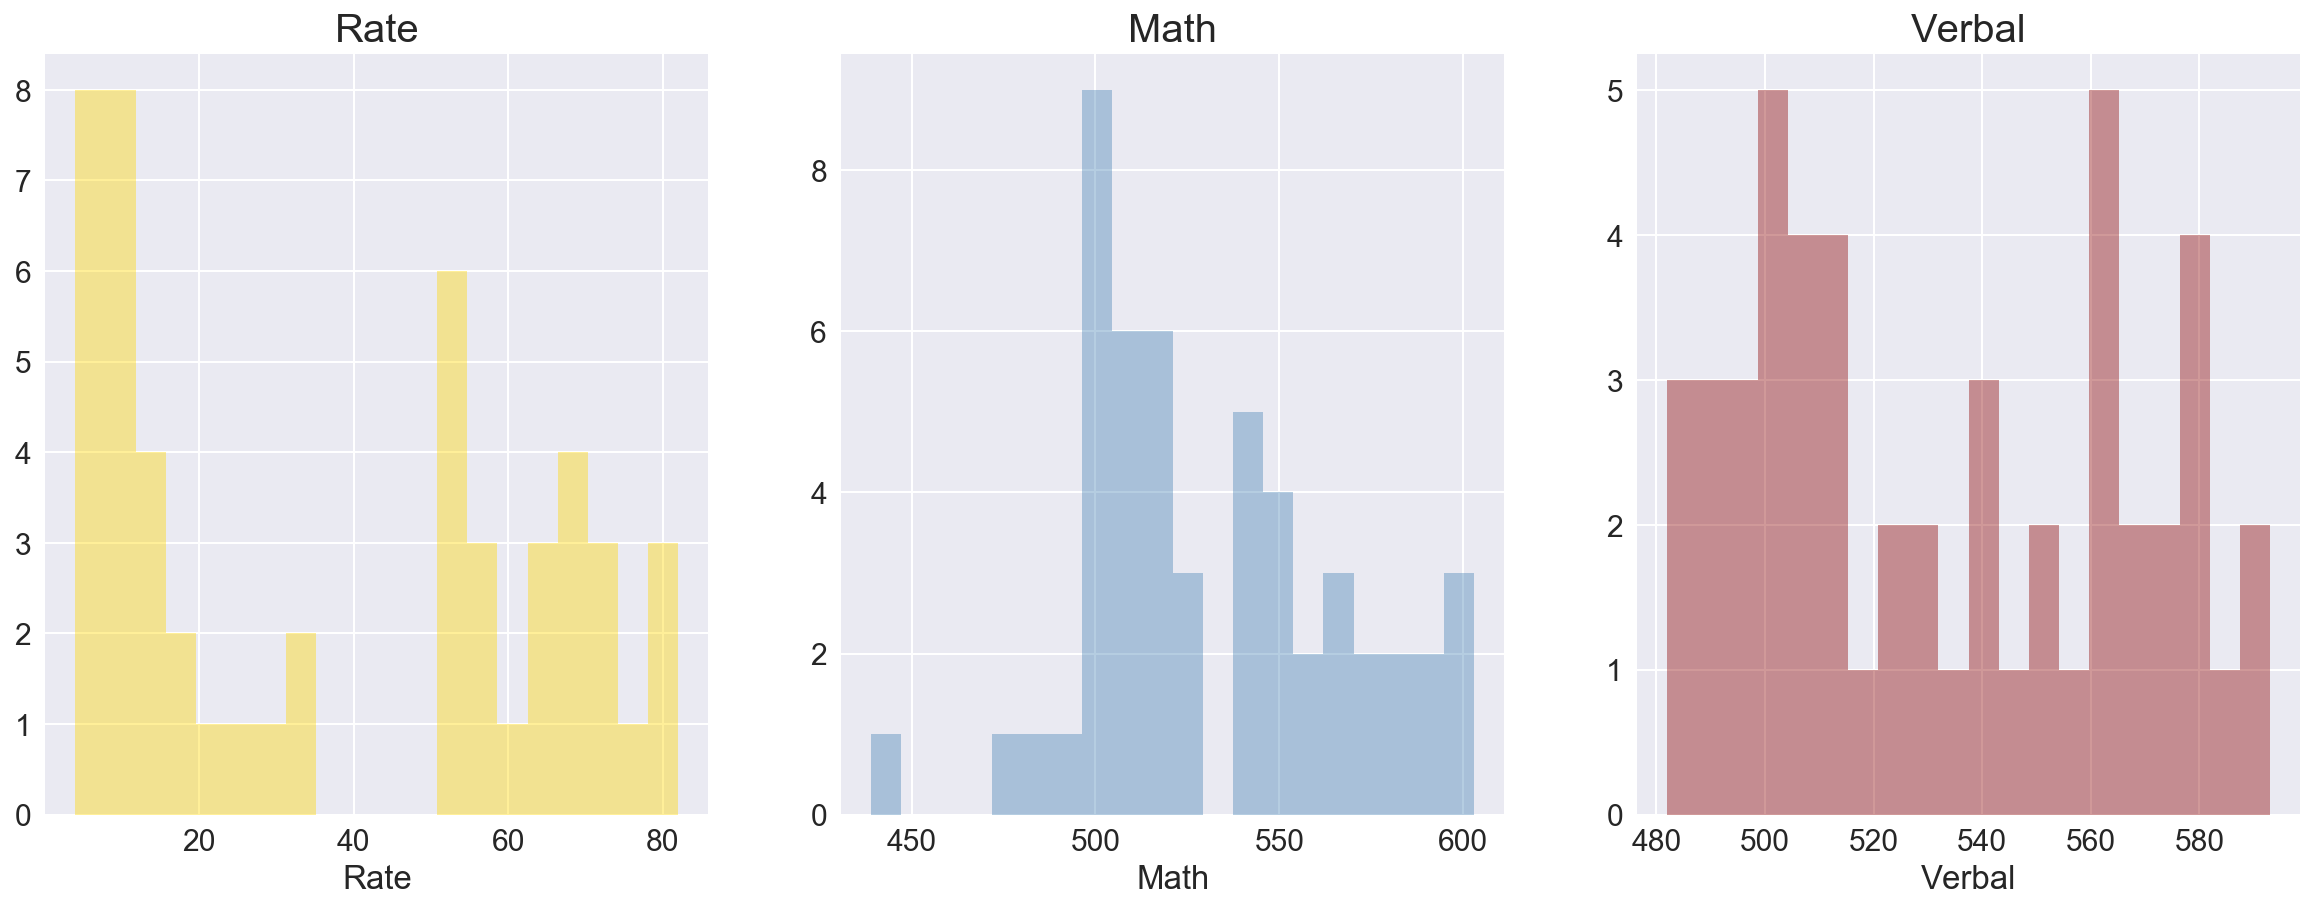

In [10]:
# Going to plot these on 3 axes within the same figure. Totally fine if you did them
# on individual axes or just with the seaborn function, of course.

import matplotlib.pyplot as plt
import seaborn as sns

fig, axarr = plt.subplots(1, 3, figsize=(18,7))

axarr[0] = sns.distplot(sat.Rate, kde=False, color='gold', ax=axarr[0], bins=20)
axarr[1] = sns.distplot(sat.Math, kde=False, color='steelblue', ax=axarr[1], bins=20)
axarr[2] = sns.distplot(sat.Verbal, kde=False, color='darkred', ax=axarr[2], bins=20)

axarr[0].set_title('Rate', fontsize=20)
axarr[1].set_title('Math', fontsize=20)
axarr[2].set_title('Verbal', fontsize=20)

plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

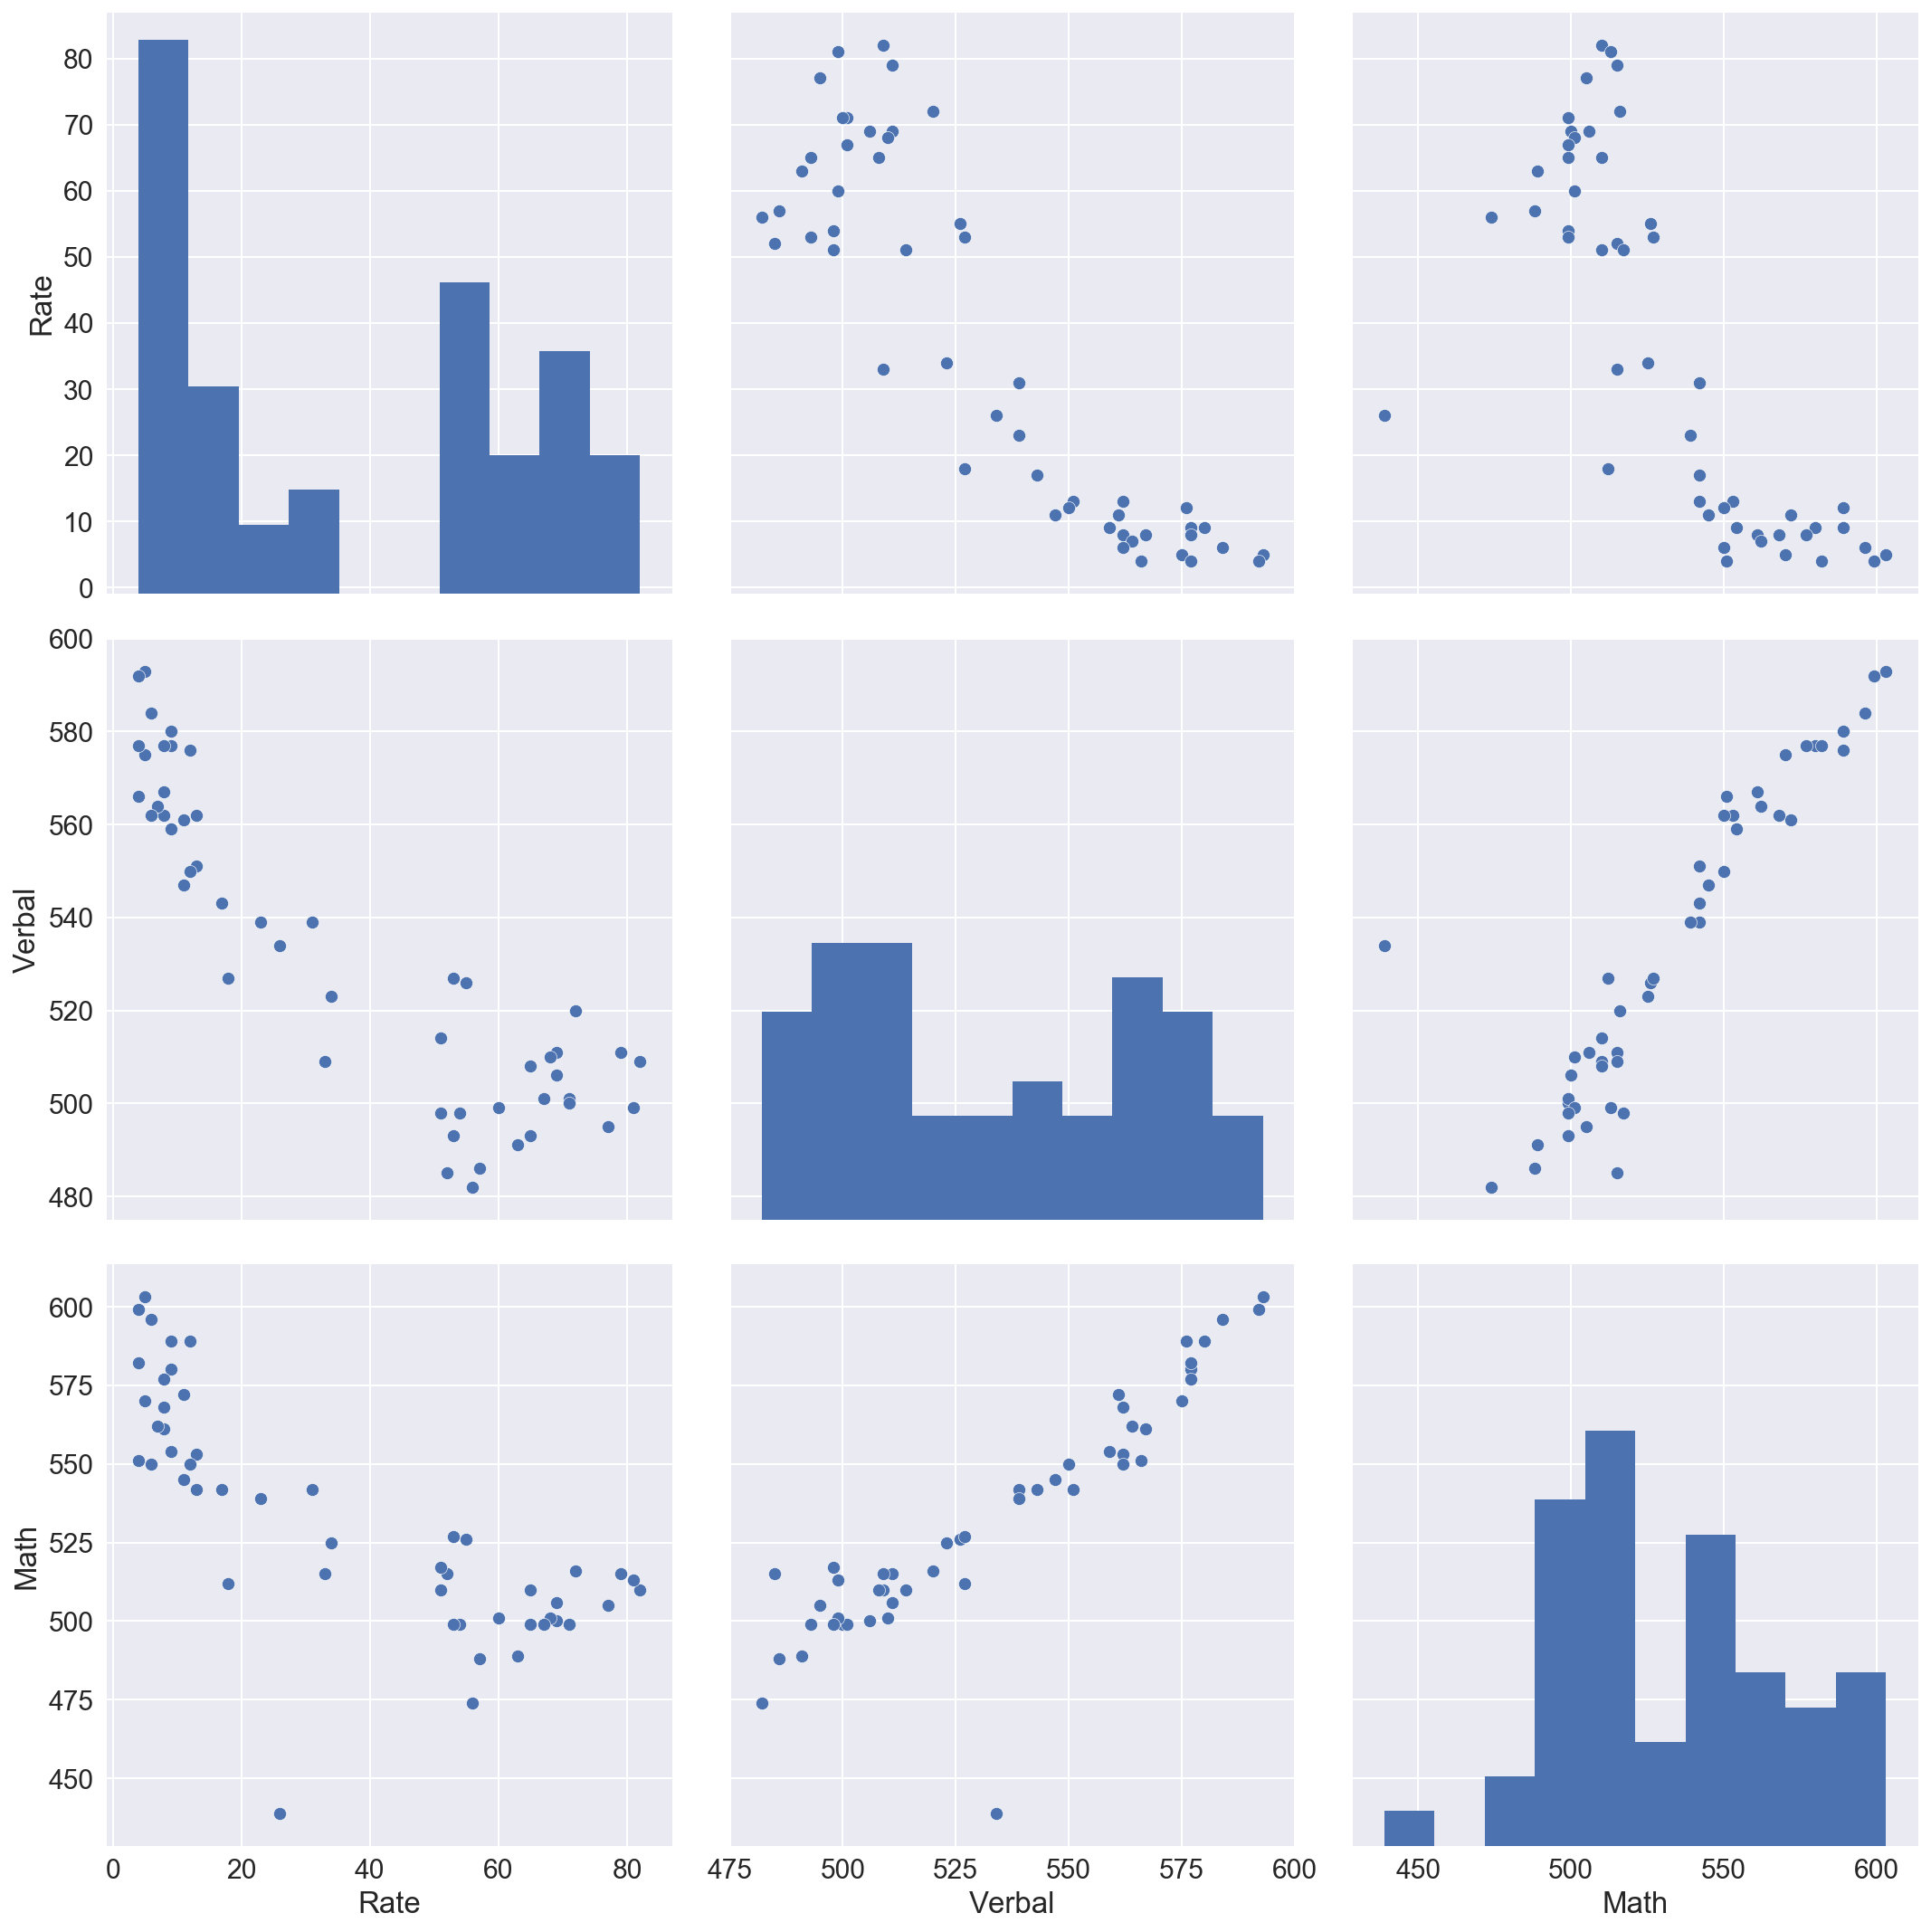

In [11]:
# Something to note here that you may not have seen yet:
# plot_kws allows me to pass a dictionary down to matplotlib's plot function 
# which is controlling the scatter plots. I'm telling it to set s=50 for those
# different scatter plots, which makes the points bigger.
sns.pairplot(sat, size=5, plot_kws={'s':50});

**A:** We've got a lot of clear relationships in this data as evidenced by the pairplot, and what looks like a single outlier state in there as well.

1. Increasing Rate is associated with lower scores in Math and Verbal, though perhaps not that strongly.
2. Verbal and Math scores are correlated.

Why would _more_ students taking the SAT in a state result in lower scores? One hypothesis: states that have low rates of SAT takers are states where public schools are of lower quality and don't push students to take it. The students that are taking the SAT in those states are more likely to be attending private school and come from a higher socioeconomic background.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

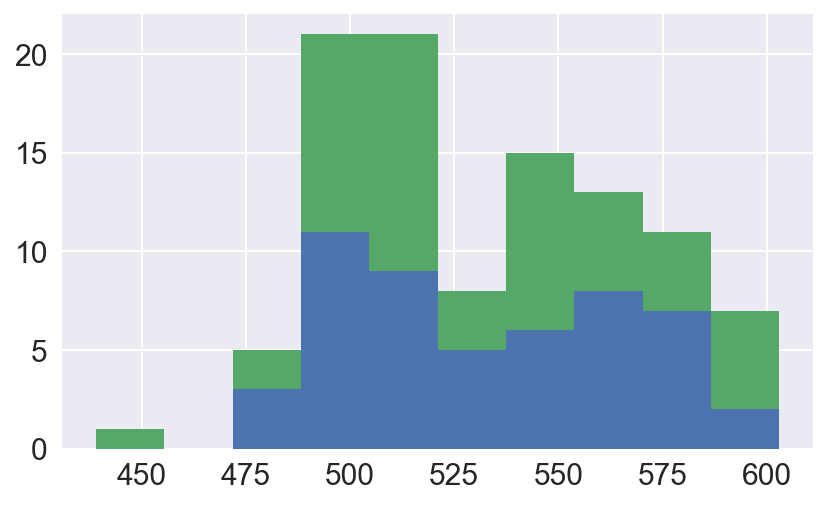

In [13]:
plt.hist([sat.Verbal,sat.Math],stacked=True);

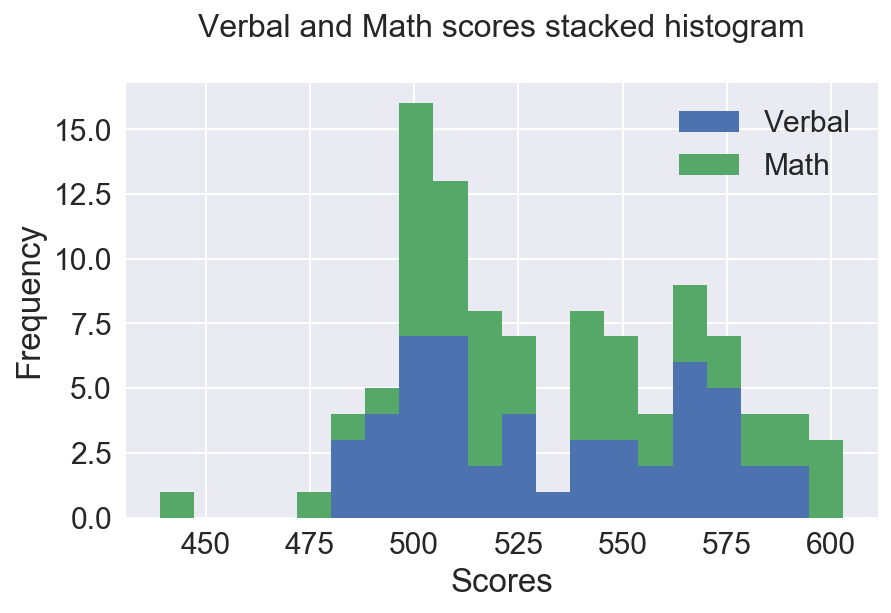

In [12]:
fig = plt.figure()
ax = fig.gca()

# Plot the bars for just verbal and math
sat[['Verbal','Math']].plot.hist(stacked=True, bins=20, ax=ax)

# put the title on
ax.set_title('Verbal and Math scores stacked histogram\n',fontsize=16)
ax.set_xlabel('Scores')

plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

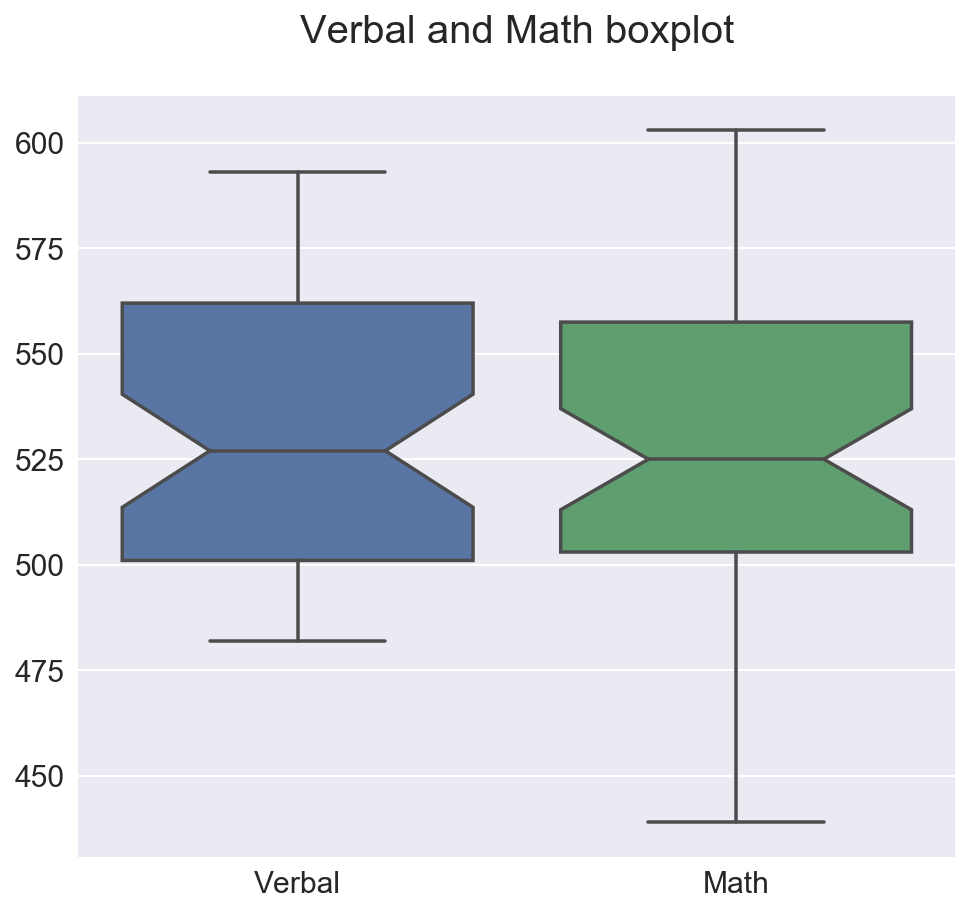

In [13]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()

ax = sns.boxplot(data=sat[['Verbal','Math']], ax=ax, notch=True)

ax.set_title('Verbal and Math boxplot\n', fontsize=20)

plt.show()

**A:** A boxplot tells you information about the quantiles and outliers of a variable's distribution instead of just looking at a histogram. This allows us to directly compare side-by-side how these variables are distributed compared to each other, which would be difficult with a histogram.

A scatterplot will show us something different: a potential linear relationship between variables, or more generally how the variable's observations vary with each other.

Plotting rate on this chart is inappropriate because it is on a different scale.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


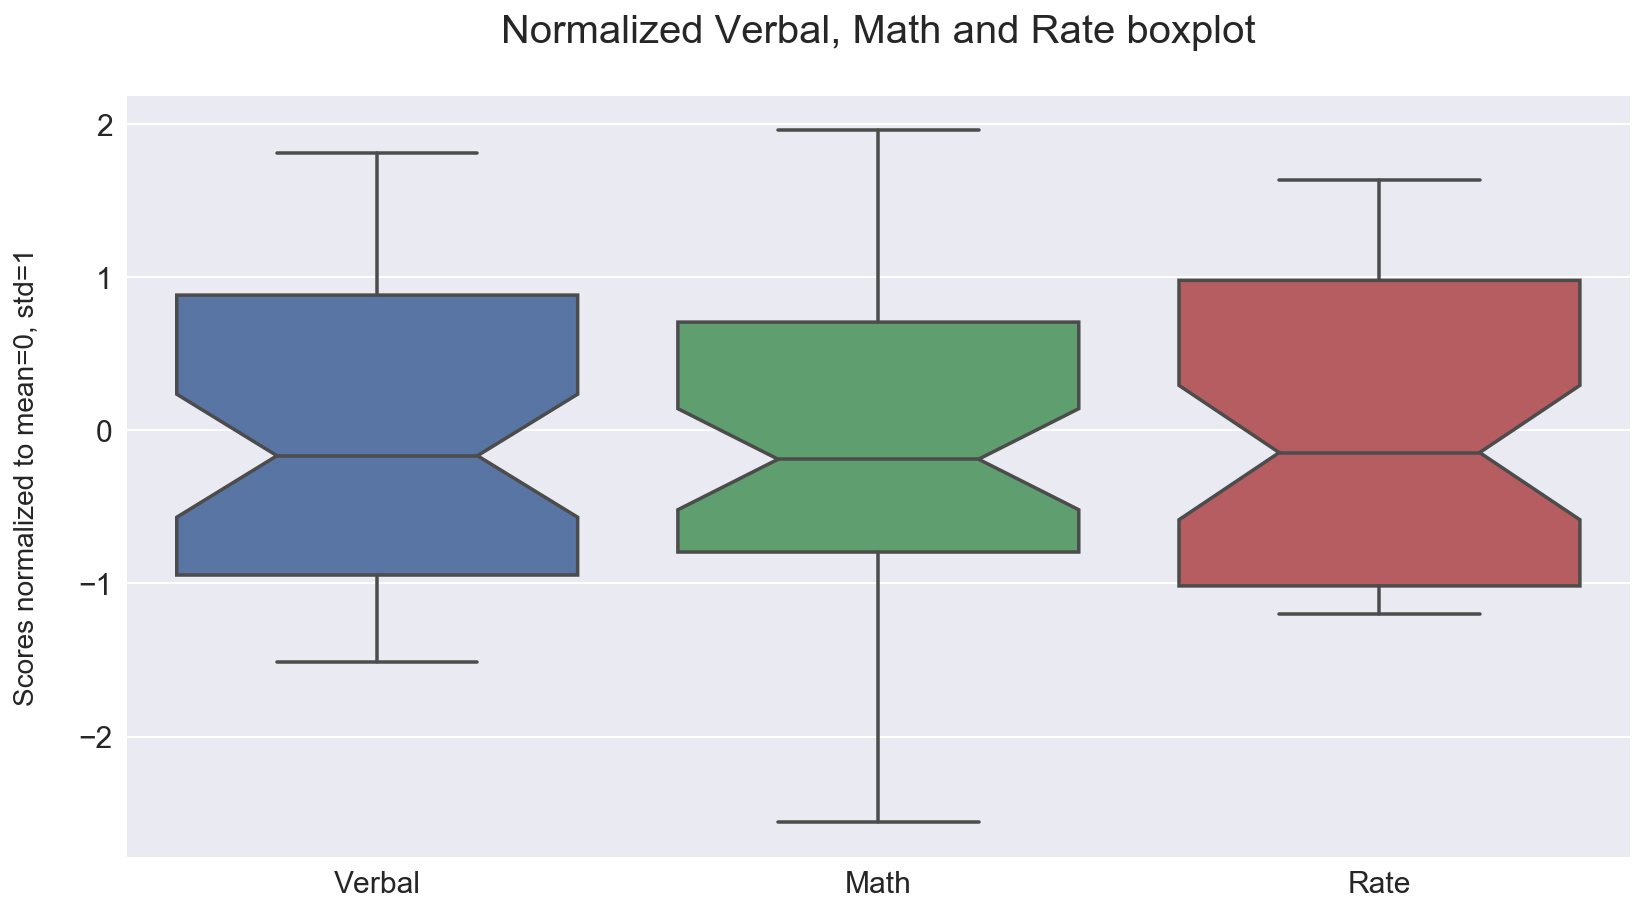

In [14]:
# I am just going to do standardization/normalization here, 
# subtracting the mean and dividing by the standard deviation for each variable.
# This means that each variable will have a mean 0 and a standard deviation 1, putting them on the same scale.
# This will let me compare them side-by-side on a boxplot.

sat_norm = sat[['Verbal','Math','Rate']]
sat_norm = (sat_norm - sat_norm.mean()) / sat_norm.std()

fig = plt.figure(figsize=(12,7))
ax = fig.gca()

ax = sns.boxplot(data=sat_norm, ax=ax, notch=True)

ax.set_title('Normalized Verbal, Math and Rate boxplot\n', fontsize=20)
ax.set_ylabel('Scores normalized to mean=0, std=1\n', fontsize=14)

plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [15]:
verbal_mean = sat.Verbal.mean()

verbal_mask = (sat.Verbal > verbal_mean)

verbal_subset = sat.loc[verbal_mask, :]
verbal_subset

State  Rate  Verbal  Math
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

In [16]:
print(verbal_subset.shape[0])

24


**A:** 24 states are scoring above the mean verbal score. This indicates that because essentially half of the states are above the mean, the distribution of verbal scores is not significantly skewed positively or negatively.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [17]:
verbal_median = sat.Verbal.median()

verbal_med_mask = (sat.Verbal > verbal_median)

verbal_med_subset = sat.loc[verbal_med_mask, :]
verbal_med_subset

State  Rate  Verbal  Math
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

In [18]:
print('States above mean verbal score:', verbal_subset.State.count())
print('States above median verbal score:', verbal_med_subset.State.count())

print('Verbal mean:', verbal_mean)
print('Verbal median:', verbal_median)

States above mean verbal score: 24
States above median verbal score: 24
Verbal mean: 532.5294117647059
Verbal median: 527.0


**A:** Both mean and median have 24 states above. Again, this is not a skewed distribution.

Just a note: SAT scores are normalized scores to give takers their "percentile", so non-skewness properties are enforced. You may have explored this in a later unrequired question.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [19]:
sat['Verbal_Math_diff'] = sat.Verbal - sat.Math
sat.head(3)

State  Rate  Verbal  Math  Verbal_Math_diff
0    CT    82     509   510                -1
1    NJ    81     499   513               -14
2    MA    79     511   515                -4

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [20]:
verbal_10greater = sat.sort_values('Verbal_Math_diff', ascending=False).iloc[0:10,:]
verbal_10lower= sat.sort_values('Verbal_Math_diff', ascending=True).iloc[0:10,:]

print(verbal_10greater.head(3))
print(verbal_10lower.head(3))

   State  Rate  Verbal  Math  Verbal_Math_diff
27    OH    26     534   439                95
50    MS     4     566   551                15
29    WV    18     527   512                15
   State  Rate  Verbal  Math  Verbal_Math_diff
21    HI    52     485   515               -30
23    CA    51     498   517               -19
1     NJ    81     499   513               -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [21]:
sat[['Verbal','Math','Rate','Verbal_Math_diff']].corr()

Verbal      Math      Rate  Verbal_Math_diff
Verbal            1.000000  0.899909 -0.888121          0.044527
Math              0.899909  1.000000 -0.773419         -0.395574
Rate             -0.888121 -0.773419  1.000000         -0.098671
Verbal_Math_diff  0.044527 -0.395574 -0.098671          1.000000

**A:** The correlation matrix shows us the (linear) relationships between variables as measured by the Pearson correlation coefficient. A Pearson r of -1 is a perfect inverse relationship, a 1 is a perfect relationship, and a 0 is no linear relationship.

Here's what we can see from the correlation matrix:

1. Verbal score is highly correlated with Math. So, states that score higher in one tend to score higher in the other, and vice versa.
2. Verbal is negatively correlated with rate. The higher proportion of students that take the SAT, the lower the average Verbal score.
3. Likewise, Math is negatively correlated with Rate as well, though not as much.
4. Verbal score has little to no relationship with the difference between verbal and math scores. What does this mean? As Verbal scores go up, this does not imply that the difference between Verbal and Math increases!
5. Interestingly, the difference between Verbal and Math has a decent negative correlation with Math. This indicates that as the difference between Verbal and Math increases, the average Math score is more likely to decrease.
6. Rate and Verbal-Math difference have a small, likely insignificant negative correlation.

So, you are probably wondering, **why is there no correlation between Verbal and the difference, but a negative correlation between Math and the difference?**

Let's create a pairplot of the variables to help understand this:

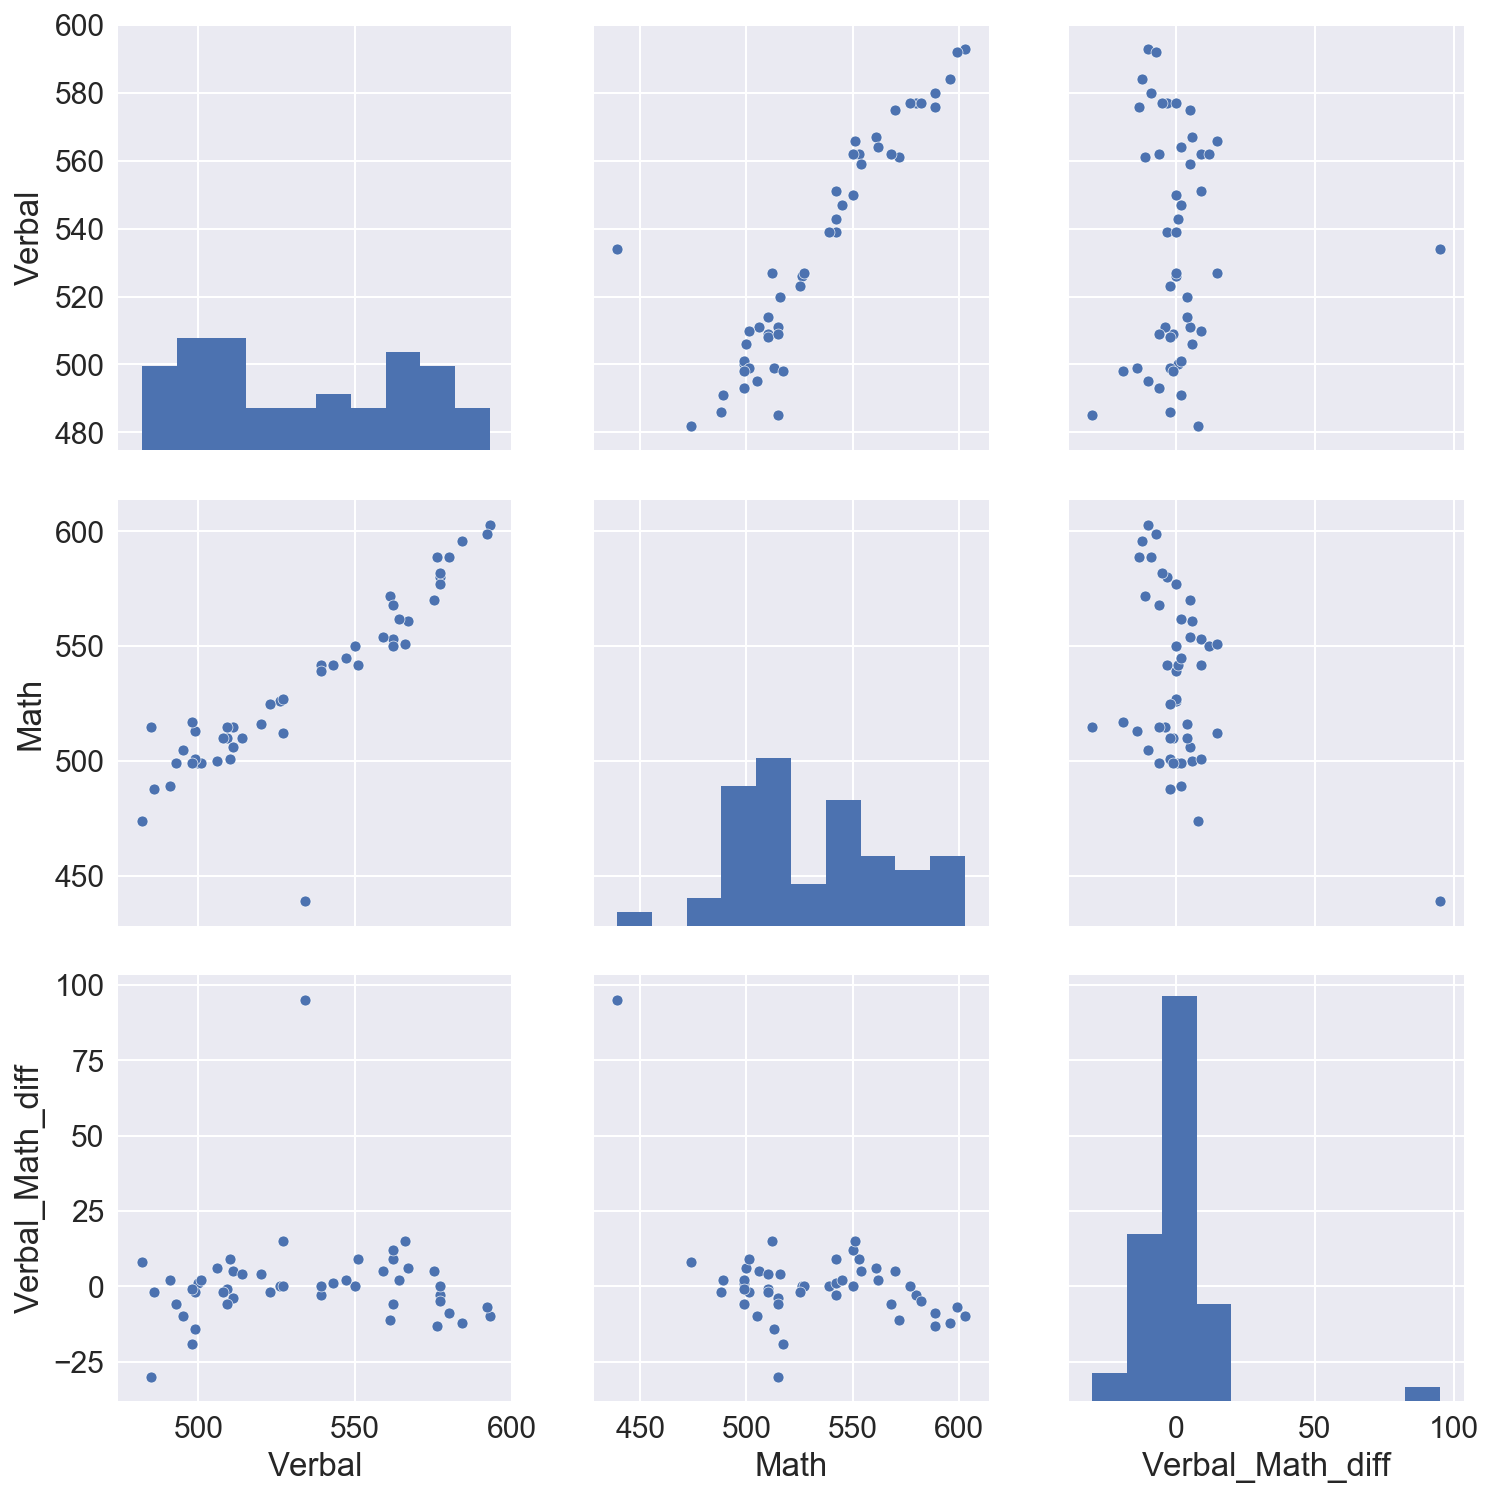

In [22]:
sns.pairplot(sat[['Verbal','Math','Verbal_Math_diff']], size=3.5, plot_kws={'s':30});

Besides that weird outlier, it looks like there isn't much of a correspondence. Is the difference in the correlations caused by the outlier?

I'll find the outlier state and remove it, then look at the correlation matrix again.

In [23]:
outlier_mask = (sat.Verbal_Math_diff == sat.Verbal_Math_diff.max())
outlier_state = sat.loc[outlier_mask, :]
outlier_state

State  Rate  Verbal  Math  Verbal_Math_diff
27    OH    26     534   439                95

In [24]:
sat_nooutlier = sat.loc[sat.State != 'OH', :]
sat_nooutlier.corr()

Rate    Verbal      Math  Verbal_Math_diff
Rate              1.000000 -0.889227 -0.854664         -0.095529
Verbal           -0.889227  1.000000  0.969265          0.074463
Math             -0.854664  0.969265  1.000000         -0.173161
Verbal_Math_diff -0.095529  0.074463 -0.173161          1.000000

The correlation between Math and the difference has been dramatically reduced. This is an example of how outliers can affect your statistical metrics in unsavory ways, and why you need to be rigorous about examining your data.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [25]:
sat_nooutlier.describe()

Rate      Verbal        Math  Verbal_Math_diff
count  50.000000   50.000000   50.000000         50.000000
mean   37.220000  532.500000  533.700000         -1.200000
std    27.785101   33.698695   34.120584          8.417668
min     4.000000  482.000000  474.000000        -30.000000
25%     9.000000  501.000000  505.250000         -6.000000
50%    33.500000  526.500000  525.500000          0.000000
75%    64.500000  562.000000  559.250000          4.000000
max    82.000000  593.000000  603.000000         15.000000

    count: the number of observations/rows/states (we've taken out OH the outlier at this point)
    mean: the mean of the column
    std: standard deviation of the column
    min: minimum value of the column
    25%: the 25% quantile, which is, if we were to order all the values in the column from lowest to highest, the value 25% of the way through.
    50%: this is the same but at 50%, which is also known as the median
    75% same thing at 75%
    max: the maximum value in the column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [26]:
sat_cov = sat.cov()
sat_cov

Rate       Verbal         Math  Verbal_Math_diff
Rate              759.04  -816.280000  -773.220000        -43.060000
Verbal           -816.28  1112.934118  1089.404706         23.529412
Math             -773.22  1089.404706  1316.774902       -227.370196
Verbal_Math_diff  -43.06    23.529412  -227.370196        250.899608

Covariance and correlation are both measures of linear relatedness between two variables. More specifically, covariance measures whether two variables deviate from their mean in the same way across observations (and whether that is in the same direction or in opposite directions). 

The correlation is essentially the same as the covariance, but normalized (divided) by the product of the standard deviation of the two variables. This guarantees that the metric, Pearson's r, will fall between -1 (perfect anticorrelation) and 1 (perfect correlation). Covariance measures, on the other hand, are unnormalized by this quantity and so their magnitude is related to the magnitude of the variance of the measures. 


$$ cov(X, Y) = \sum_{i=1}^N \frac{(X - \bar{X})(Y - \bar{Y})}{N}$$


$$ cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

[Here is a more formal, but still digestible page on the difference between the two on wikipedia.](https://en.wikipedia.org/wiki/Covariance_and_correlation)

The correlation matrix is almost always preferred to the covariance matrix because you can directly compare the correlation measures across different compared variables. With the covariance, we need to keep in mind the differences in variances between the variables when comparing.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [27]:
drug_data_filepath = '../drug-use-by-age.csv'

drug = pd.read_csv(drug_data_filepath)

drug.head()

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   

  crack-frequency        ...          oxycontin-use oxycontin-frequency  \
0               -        ...                    0.1                24.5   
1             3.0        ...                    0.1                41.0   
2               -        ...                    0.4                 4.5   
3             9.5        ...                    0.8                 3.0   
4             1.0        ...                    1.1                 4.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0               0.2                    52.0            0.2   
1               0.3                    25.5            0.3   
2               0.9                     5.0            0.8   
3               2.0                     4.5            1.5   
4               2.4                    11.0            1.8   

  stimulant-frequency  meth-use  meth-frequency  sedative-use  \
0                 2.0       0.0               -           0.2   
1                 4.0       0.1             5.0           0.1   
2                12.0       0.1            24.0           0.2   
3                 6.0       0.3            10.5           0.4   
4                 9.5       0.3            36.0           0.2   

  sedative-frequency  
0               13.0  
1               19.0  
2               16.5  
3               30.0  
4                3.0  

[5 rows x 28 columns]

In [28]:
drug.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

The dtypes print-out shows that a lot of the variables that are supposed to be numeric are in fact strings, which means there are values in there that are either supposed to be missing or perhaps corrupted in some way. 

Time to take a deeper look...

Start by checking out the unique values of the string variables that cannot be converted to digits.

In [29]:
def not_num_checker(x):
    try:
        x = float(x)
        return False
    except:
        return True

def find_invalid_items(data, column):
    print('Column:', column)
    print('Invalid row items:')
    print([x for x in data[column].unique() if not_num_checker(x)])
    print('-------------------------------------------------\n')
    
string_columns = [c for c in drug.columns if drug[c].dtype == np.object]
print('Object columns:', string_columns)

for sc in string_columns:
    find_invalid_items(drug, sc)

Object columns: ['age', 'cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency']
Column: age
Invalid row items:
['22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+']
-------------------------------------------------

Column: cocaine-frequency
Invalid row items:
['-']
-------------------------------------------------

Column: crack-frequency
Invalid row items:
['-']
-------------------------------------------------

Column: heroin-frequency
Invalid row items:
['-']
-------------------------------------------------

Column: inhalant-frequency
Invalid row items:
['-']
-------------------------------------------------

Column: oxycontin-frequency
Invalid row items:
['-']
-------------------------------------------------

Column: meth-frequency
Invalid row items:
['-']
-------------------------------------------------



Age looks like the trickiest one. The other columns just have strings "-" that appear to indicate nan values.
We can clean up the '-' values with the map function for pandas series objects:

In [30]:
# all columns except age (skip the first)
for sc in string_columns[1:]:
    drug.loc[:, sc] = drug[sc].map(lambda x: float(x) if x != '-' else np.nan)
    
drug[string_columns].dtypes

age                     object
cocaine-frequency      float64
crack-frequency        float64
heroin-frequency       float64
inhalant-frequency     float64
oxycontin-frequency    float64
meth-frequency         float64
dtype: object

Now to look at the age column in more detail. First print out all the unique values:

In [31]:
drug.age.unique()

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+'],
      dtype=object)

Looks like this age column might best be left "categorical", since there are age bins/ranges as well as more granular pre-teen and teenage years.

We can make another column that is numeric, where the age ranges are just the mean of the limits.

In [32]:
np.mean([50,64])

57.0

In [33]:
age_replace = {
    '12':12.,
    '13':13.,
    '14':14.,
    '15':15.,
    '16':16.,
    '17':17.,
    '18':18.,
    '19':19.,
    '20':20.,
    '21':21.,
    '22-23':22.5,
    '24-25':24.5,
    '26-29':27.5,
    '30-34':32.,
    '35-49':42.,
    '50-64':57.,
    '65+':65  
}

drug['age_num'] = drug.age.map(lambda x: age_replace[x])

Now check on those null values per column again.

In [34]:
print(drug.shape)
drug.isnull().sum()

(17, 29)


age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          1
crack-use                  0
crack-frequency            3
heroin-use                 0
heroin-frequency           1
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         1
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        1
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             2
sedative-use               0
sedative-frequency         0
age_num                    0
dtype: int64

There aren't that many missing values, but there are also not that many rows.

We may need to leave out variables with missing data from any analysis (17 rows is small - this is summary data after all).

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [35]:
drug.describe().T

count         mean          std     min       25%  \
n                         17.0  3251.058824  1297.890426  2223.0  2469.000   
alcohol-use               17.0    55.429412    26.878866     3.9    40.100   
alcohol-frequency         17.0    33.352941    21.318833     3.0    10.000   
marijuana-use             17.0    18.923529    11.959752     1.1     8.700   
marijuana-frequency       17.0    42.941176    18.362566     4.0    30.000   
cocaine-use               17.0     2.176471     1.816772     0.0     0.500   
cocaine-frequency         16.0     7.875000     8.038449     1.0     5.000   
crack-use                 17.0     0.294118     0.235772     0.0     0.000   
crack-frequency           14.0    15.035714    18.111263     1.0     5.000   
heroin-use                17.0     0.352941     0.333762     0.0     0.100   
heroin-frequency          16.0    73.281250    70.090173     1.0    39.625   
hallucinogen-use          17.0     3.394118     2.792506     0.1     0.600   
hallucinogen-frequency    17.0     8.411765    15.000245     2.0     3.000   
inhalant-use              17.0     1.388235     0.927283     0.0     0.600   
inhalant-frequency        16.0     6.156250     4.860448     2.0     3.375   
pain-releiver-use         17.0     6.270588     3.166379     0.6     3.900   
pain-releiver-frequency   17.0    14.705882     6.935098     7.0    12.000   
oxycontin-use             17.0     0.935294     0.608216     0.0     0.400   
oxycontin-frequency       16.0    14.812500    12.798275     3.0     5.750   
tranquilizer-use          17.0     2.805882     1.753379     0.2     1.400   
tranquilizer-frequency    17.0    11.735294    11.485205     4.5     6.000   
stimulant-use             17.0     1.917647     1.407673     0.0     0.600   
stimulant-frequency       17.0    31.147059    85.973790     2.0     7.000   
meth-use                  17.0     0.382353     0.262762     0.0     0.200   
meth-frequency            15.0    35.966667    31.974581     2.0    12.000   
sedative-use              17.0     0.282353     0.138000     0.0     0.200   
sedative-frequency        17.0    19.382353    24.833527     3.0     6.500   
age_num                   17.0    25.617647    15.356726    12.0    16.000   

                             50%       75%     max  
n                        2798.00  3058.000  7391.0  
alcohol-use                64.60    77.500    84.2  
alcohol-frequency          48.00    52.000    52.0  
marijuana-use              20.80    28.400    34.0  
marijuana-frequency        52.00    52.000    72.0  
cocaine-use                 2.00     4.000     4.9  
cocaine-frequency           5.25     7.250    36.0  
crack-use                   0.40     0.500     0.6  
crack-frequency             7.75    16.500    62.0  
heroin-use                  0.20     0.600     1.1  
heroin-frequency           53.75    71.875   280.0  
hallucinogen-use            3.20     5.200     8.6  
hallucinogen-frequency      3.00     4.000    52.0  
inhalant-use                1.40     2.000     3.0  
inhalant-frequency          4.00     6.625    19.0  
pain-releiver-use           6.20     9.000    10.0  
pain-releiver-frequency    12.00    15.000    36.0  
oxycontin-use               1.10     1.400     1.7  
oxycontin-frequency        12.00    18.125    46.0  
tranquilizer-use            3.50     4.200     5.4  
tranquilizer-frequency     10.00    11.000    52.0  
stimulant-use               1.80     3.000     4.1  
stimulant-frequency        10.00    12.000   364.0  
meth-use                    0.40     0.600     0.9  
meth-frequency             30.00    47.000   105.0  
sedative-use                0.30     0.400     0.5  
sedative-frequency         10.00    17.500   104.0  
age_num                    20.00    27.500    65.0

Following the describe function, some things to note about the data:

- The N per group looks solid - in the 1000s, which means these average measures are likely.
- The "frequency" columns sometimes go up above 100, so they are not percentages. The [metadata](https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age) explains:
 - Frequency variables are: "Median number of times a user in an age group used [drug] in the past 12 months."
 - Use variables are: "Percentage of those in an age group who used [drug] in the past 12 months."
- We don't see any concerning outliers that would be beyond a reasonable range, according to the variable descriptions.

We can make some new columns to plot with.

In [36]:
use_cols = [c for c in drug.columns if c.endswith('use')]
freq_cols = [c for c in drug.columns if c.endswith('frequency')]

Plot out the percent of people who use a given drug by age (plotting code adapted from an example in the Seaborn gallery):

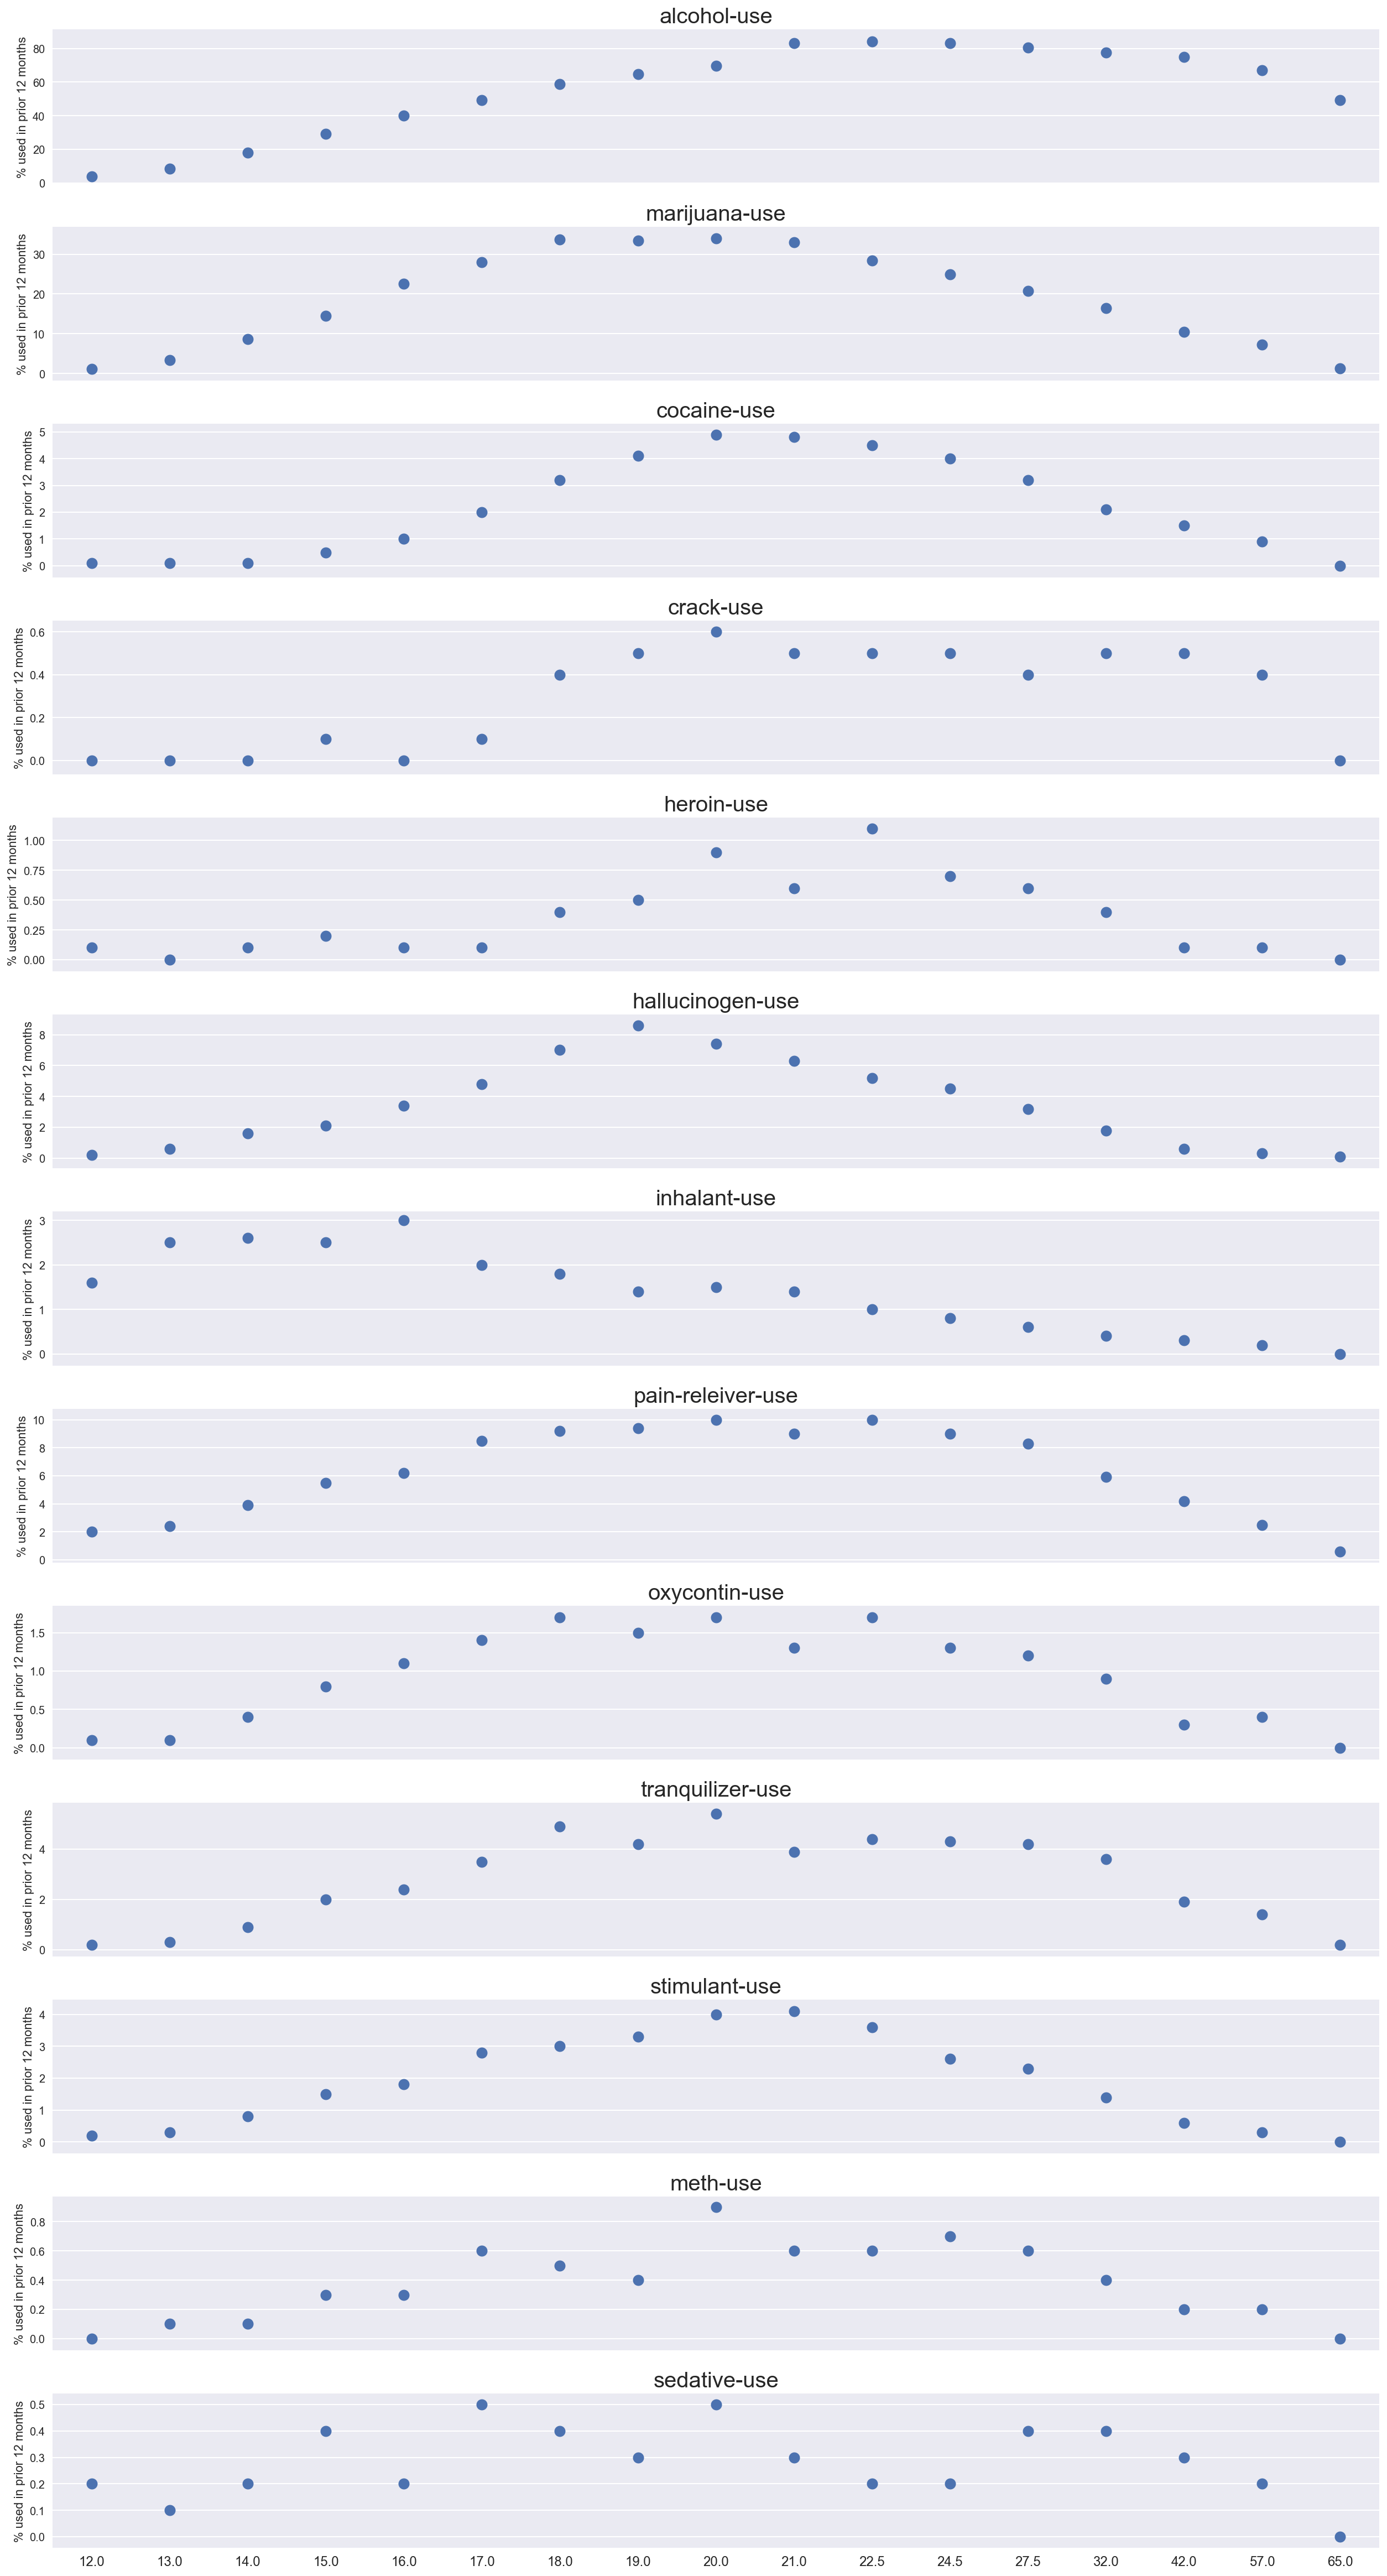

In [37]:
sns.set(style="darkgrid")

drug = drug.sort_values('age_num', ascending=True)

# Make the PairGrid
axarr = sns.PairGrid(drug, x_vars=['age'], 
                     y_vars=use_cols,
                     size=2.5, aspect=7.)

# Draw a dot plot using the stripplot function
axarr.map(sns.stripplot, size=10, orient="v", edgecolor="gray")

# Use the same x axis limits on all columns and add better labels
axarr.set(ylabel="% used in prior 12 months", xlabel="")#ylim=(0.0, 100.),

# Use semantically meaningful titles for the columns
titles = use_cols

for ax, title in zip(axarr.axes.flat, titles):

    # Set a different title for each axes
    ax.set_title(title, fontsize=20)
    ax.set_xticklabels(drug.age_num.values, fontsize=12)
    for tk in ax.get_xticklabels():
        tk.set_visible(True)
    
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

#sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()



Interesting takeaways from the use-by-age individual charts:

1. alcohol use increases and levels off at about 80%
2. marijuana gets up to around 35% in the early 20s, then drops down again with age
3. cocaine also peaks around the early 20s at about 5%
4. crack gets to about 0.6% of people at 20 and stays there
6. hallucinogens peak around 8% at 19, then drop down again
7. inhalants are actually highest at 16 and under up to 3%, then drop off
8. most drugs have the same use profile: increase up to the early 20s, and then drop back down.

Next do the same for frequency of use and see if there are interesting differences

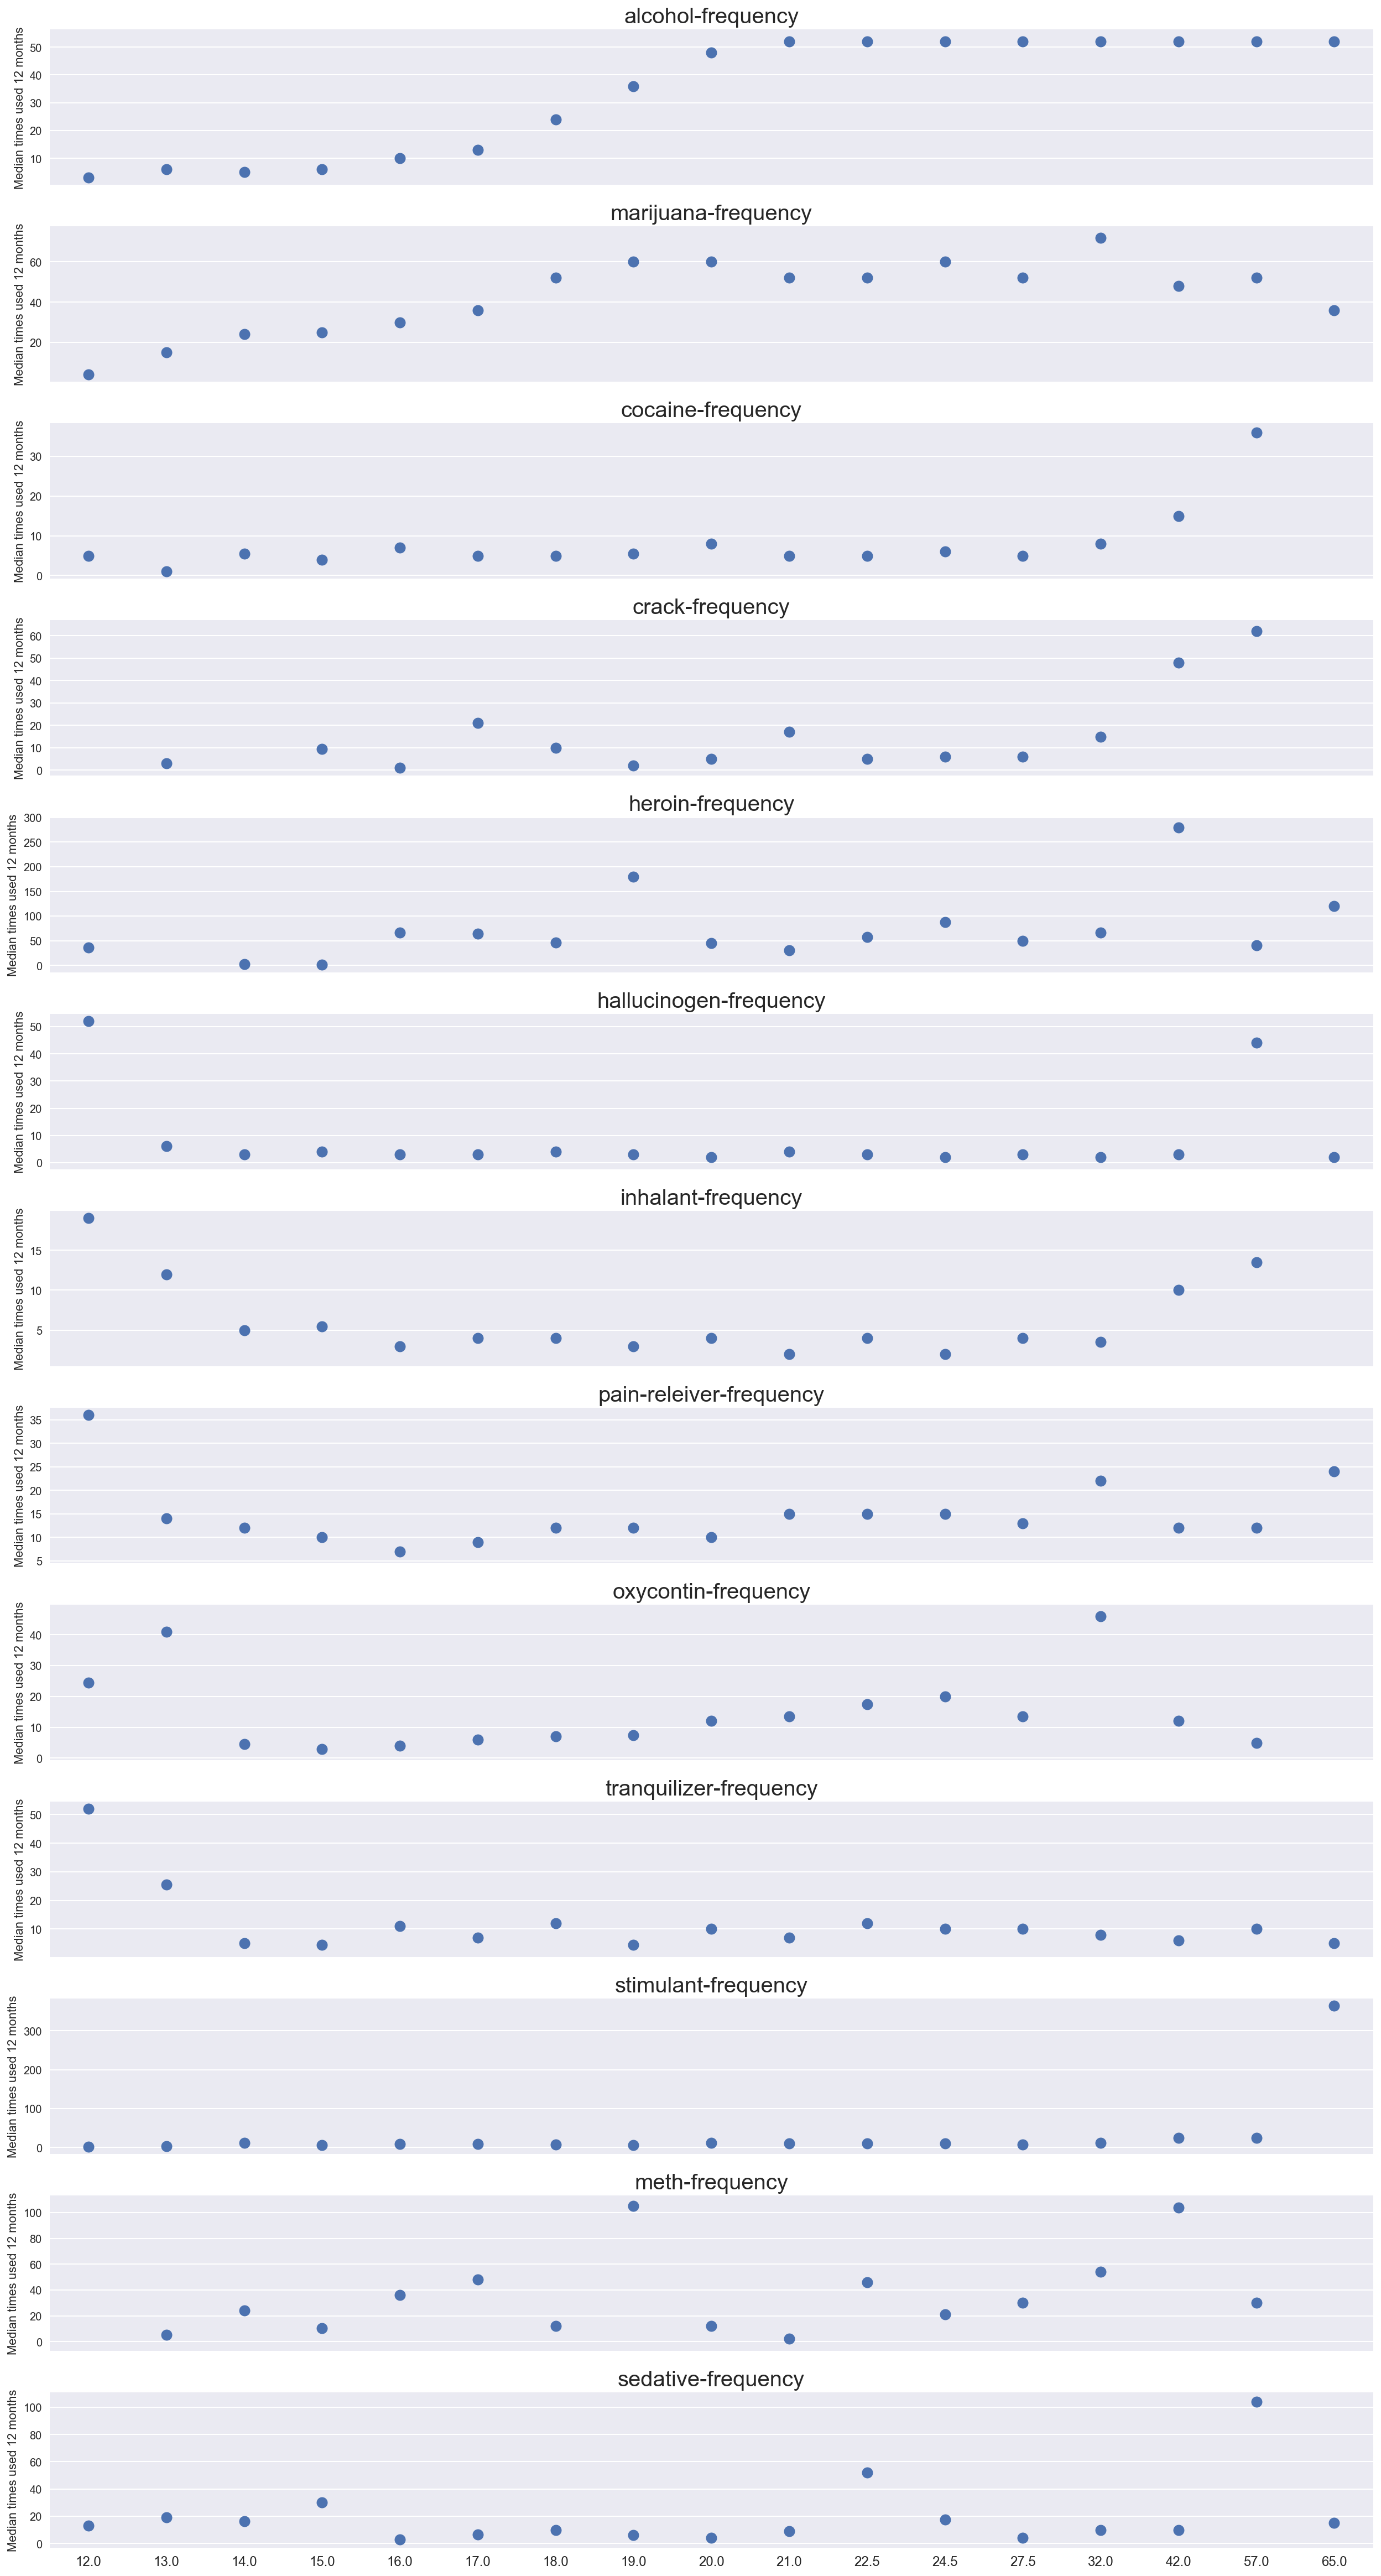

In [38]:
sns.set(style="darkgrid")

drug = drug.sort_values('age_num', ascending=True)

# Make the PairGrid
axarr = sns.PairGrid(drug, x_vars=['age'], 
                     y_vars=freq_cols,
                     size=2.5, aspect=7.)

# Draw a dot plot using the stripplot function
axarr.map(sns.stripplot, size=10, orient="v", edgecolor="gray")

# Use the same x axis limits on all columns and add better labels
axarr.set(ylabel="Median times used 12 months", xlabel="")#ylim=(0.0, 100.),

# Use semantically meaningful titles for the columns
titles = freq_cols

for ax, title in zip(axarr.axes.flat, titles):

    # Set a different title for each axes
    ax.set_title(title, fontsize=20)
    ax.set_xticklabels(drug.age_num.values, fontsize=12)
    for tk in ax.get_xticklabels():
        tk.set_visible(True)
    
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

#sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

Takeaways:

1. Marijuana use frequency stays high, even though use percent drops off with age
2. Older people using crack and cocaine have a much higher frequency of use
3. Really young kids who do hallucinogens, pain relievers, tranquilizers, and inhalants do them a lot
4. 65+ age groups have a much higher frequency of stimulant use

We can compare the use and frequency for these drugs with pairplots. There are a lot of variables, so for visibility we can increase the size of the points. Add a hue in for age to see that additional cross-section.

In [39]:
drug_use = drug[['age_num','age']+use_cols]
drug_use.rename(columns={k:k.split('-')[0] for k in use_cols}, inplace=True)
drug_use.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


age_num age  alcohol  marijuana  cocaine  crack  heroin  hallucinogen  \
0     12.0  12      3.9        1.1      0.1    0.0     0.1           0.2   
1     13.0  13      8.5        3.4      0.1    0.0     0.0           0.6   
2     14.0  14     18.1        8.7      0.1    0.0     0.1           1.6   
3     15.0  15     29.2       14.5      0.5    0.1     0.2           2.1   
4     16.0  16     40.1       22.5      1.0    0.0     0.1           3.4   

   inhalant  pain  oxycontin  tranquilizer  stimulant  meth  sedative  
0       1.6   2.0        0.1           0.2        0.2   0.0       0.2  
1       2.5   2.4        0.1           0.3        0.3   0.1       0.1  
2       2.6   3.9        0.4           0.9        0.8   0.1       0.2  
3       2.5   5.5        0.8           2.0        1.5   0.3       0.4  
4       3.0   6.2        1.1           2.4        1.8   0.3       0.2

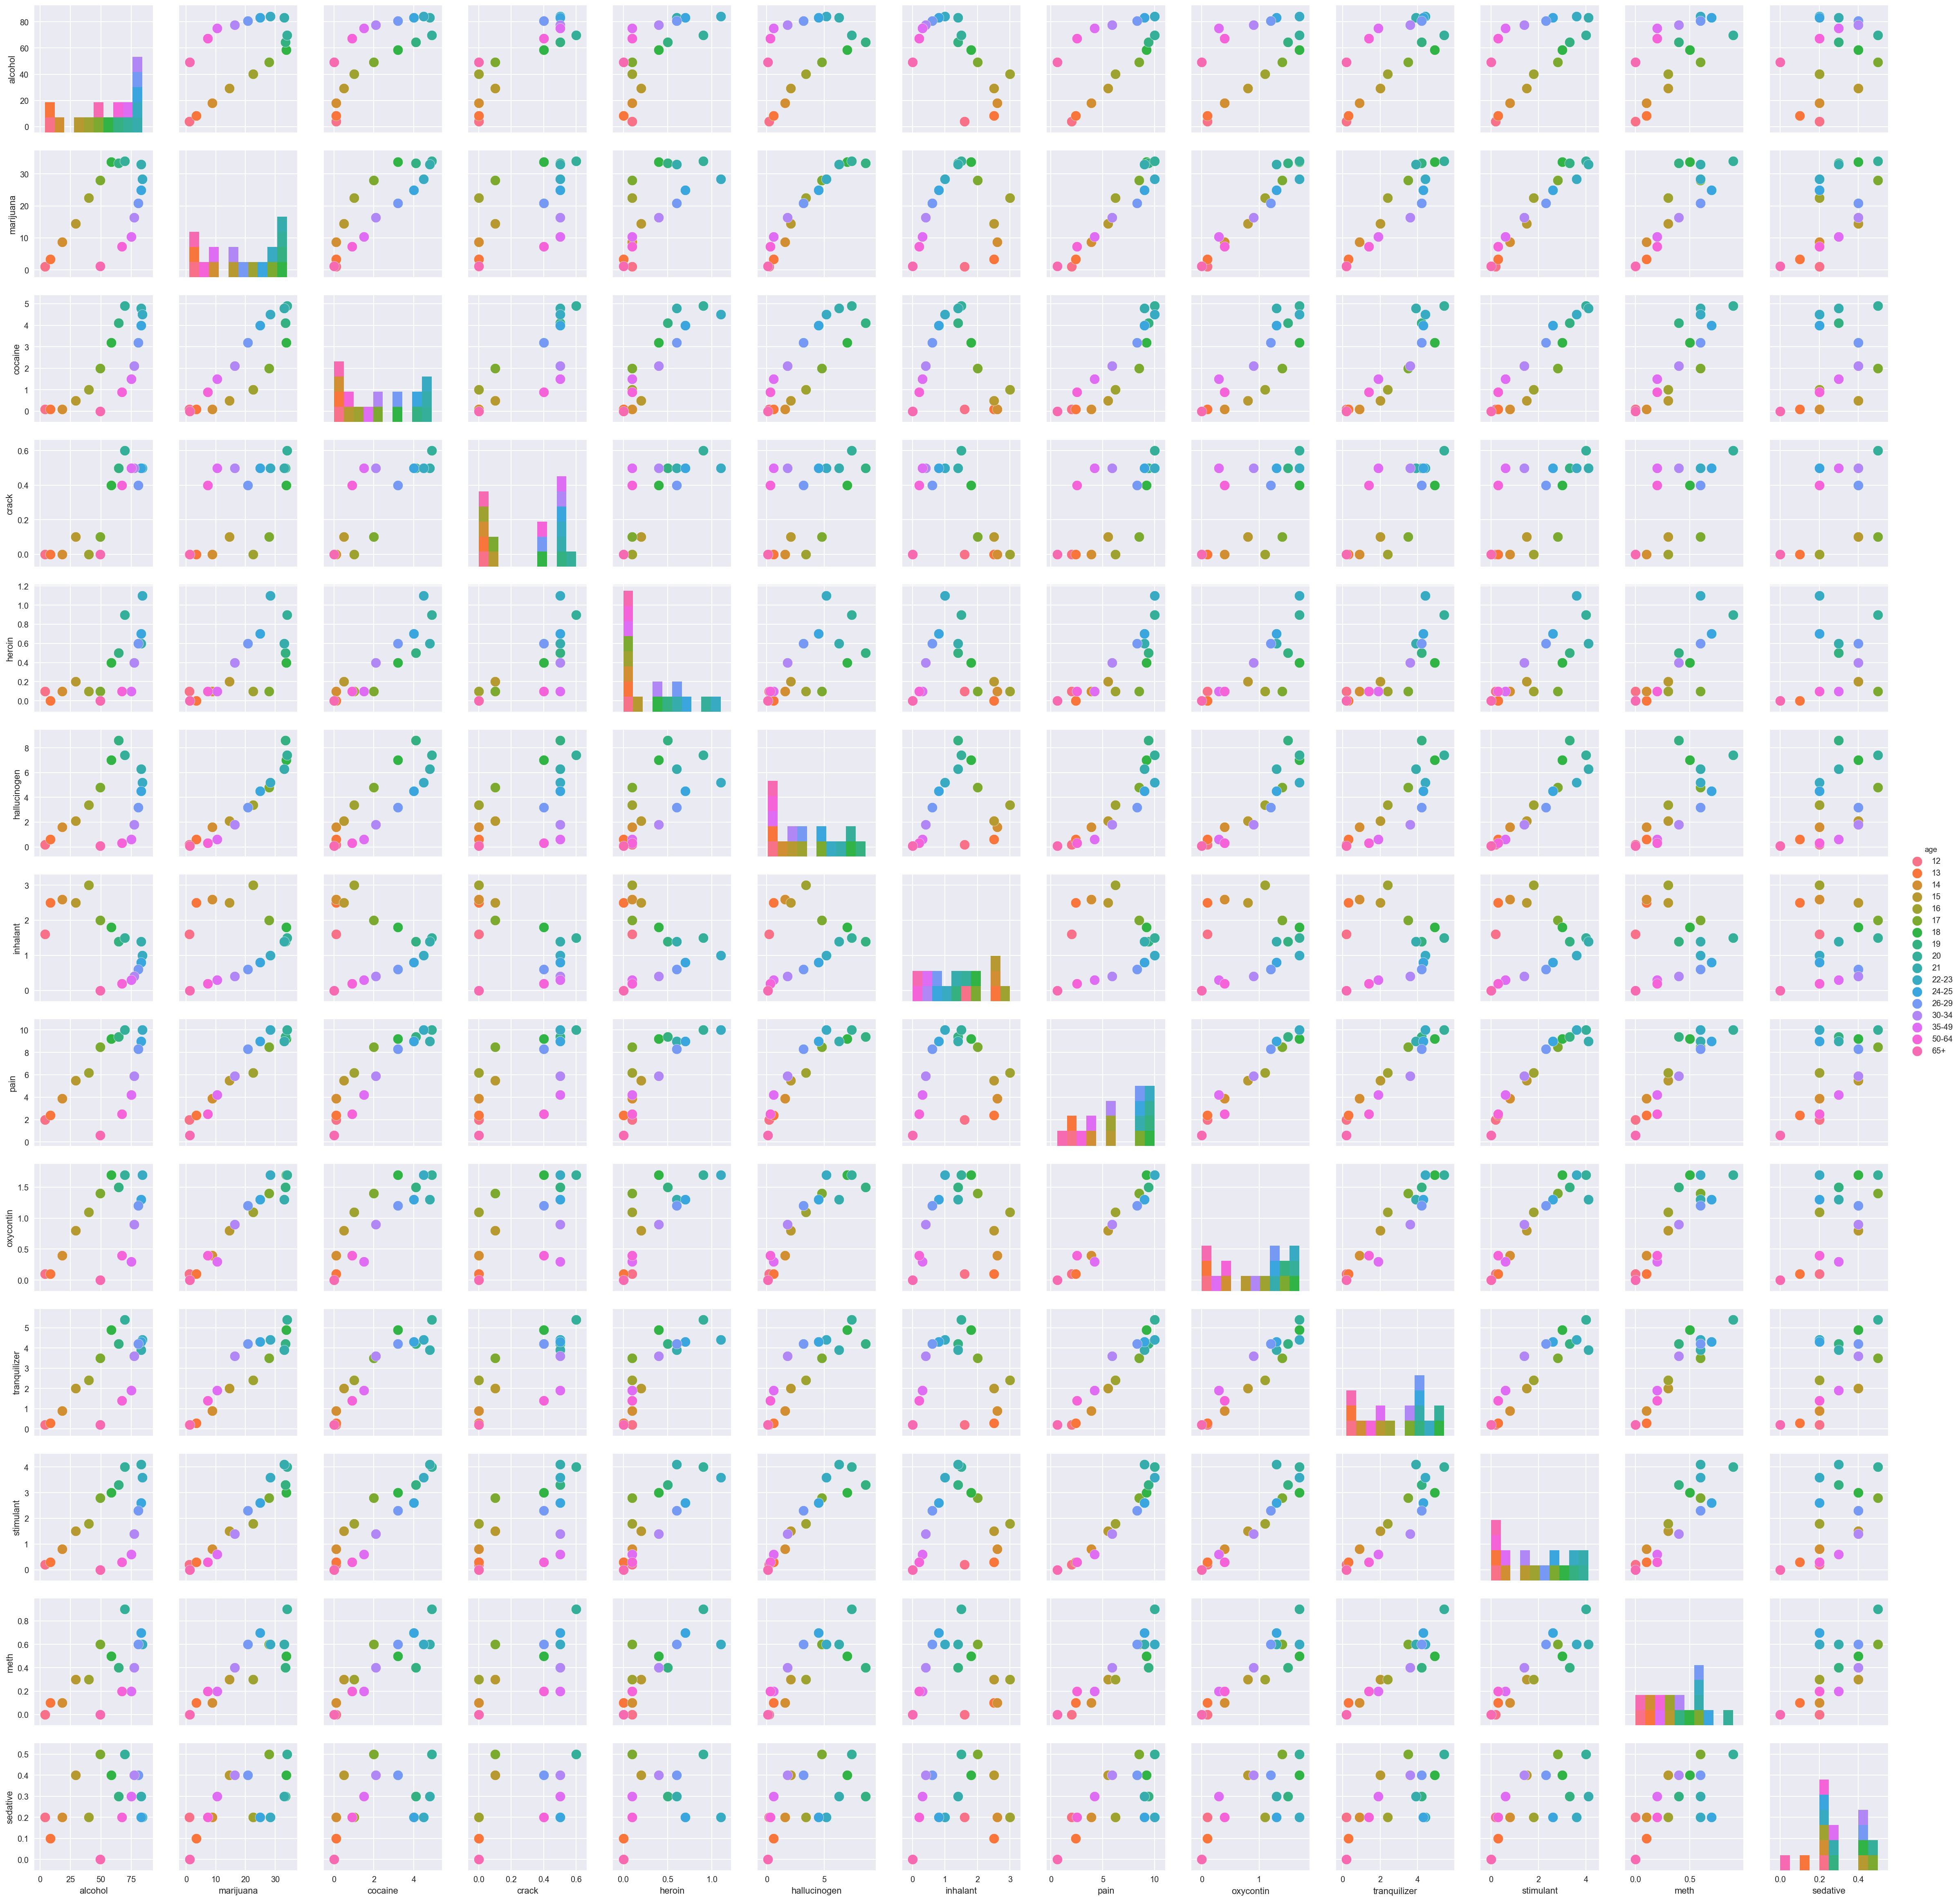

In [40]:
sns.pairplot(drug_use, hue='age', vars=[c.split('-')[0] for c in use_cols],
             kind='scatter', plot_kws={'s':150});

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


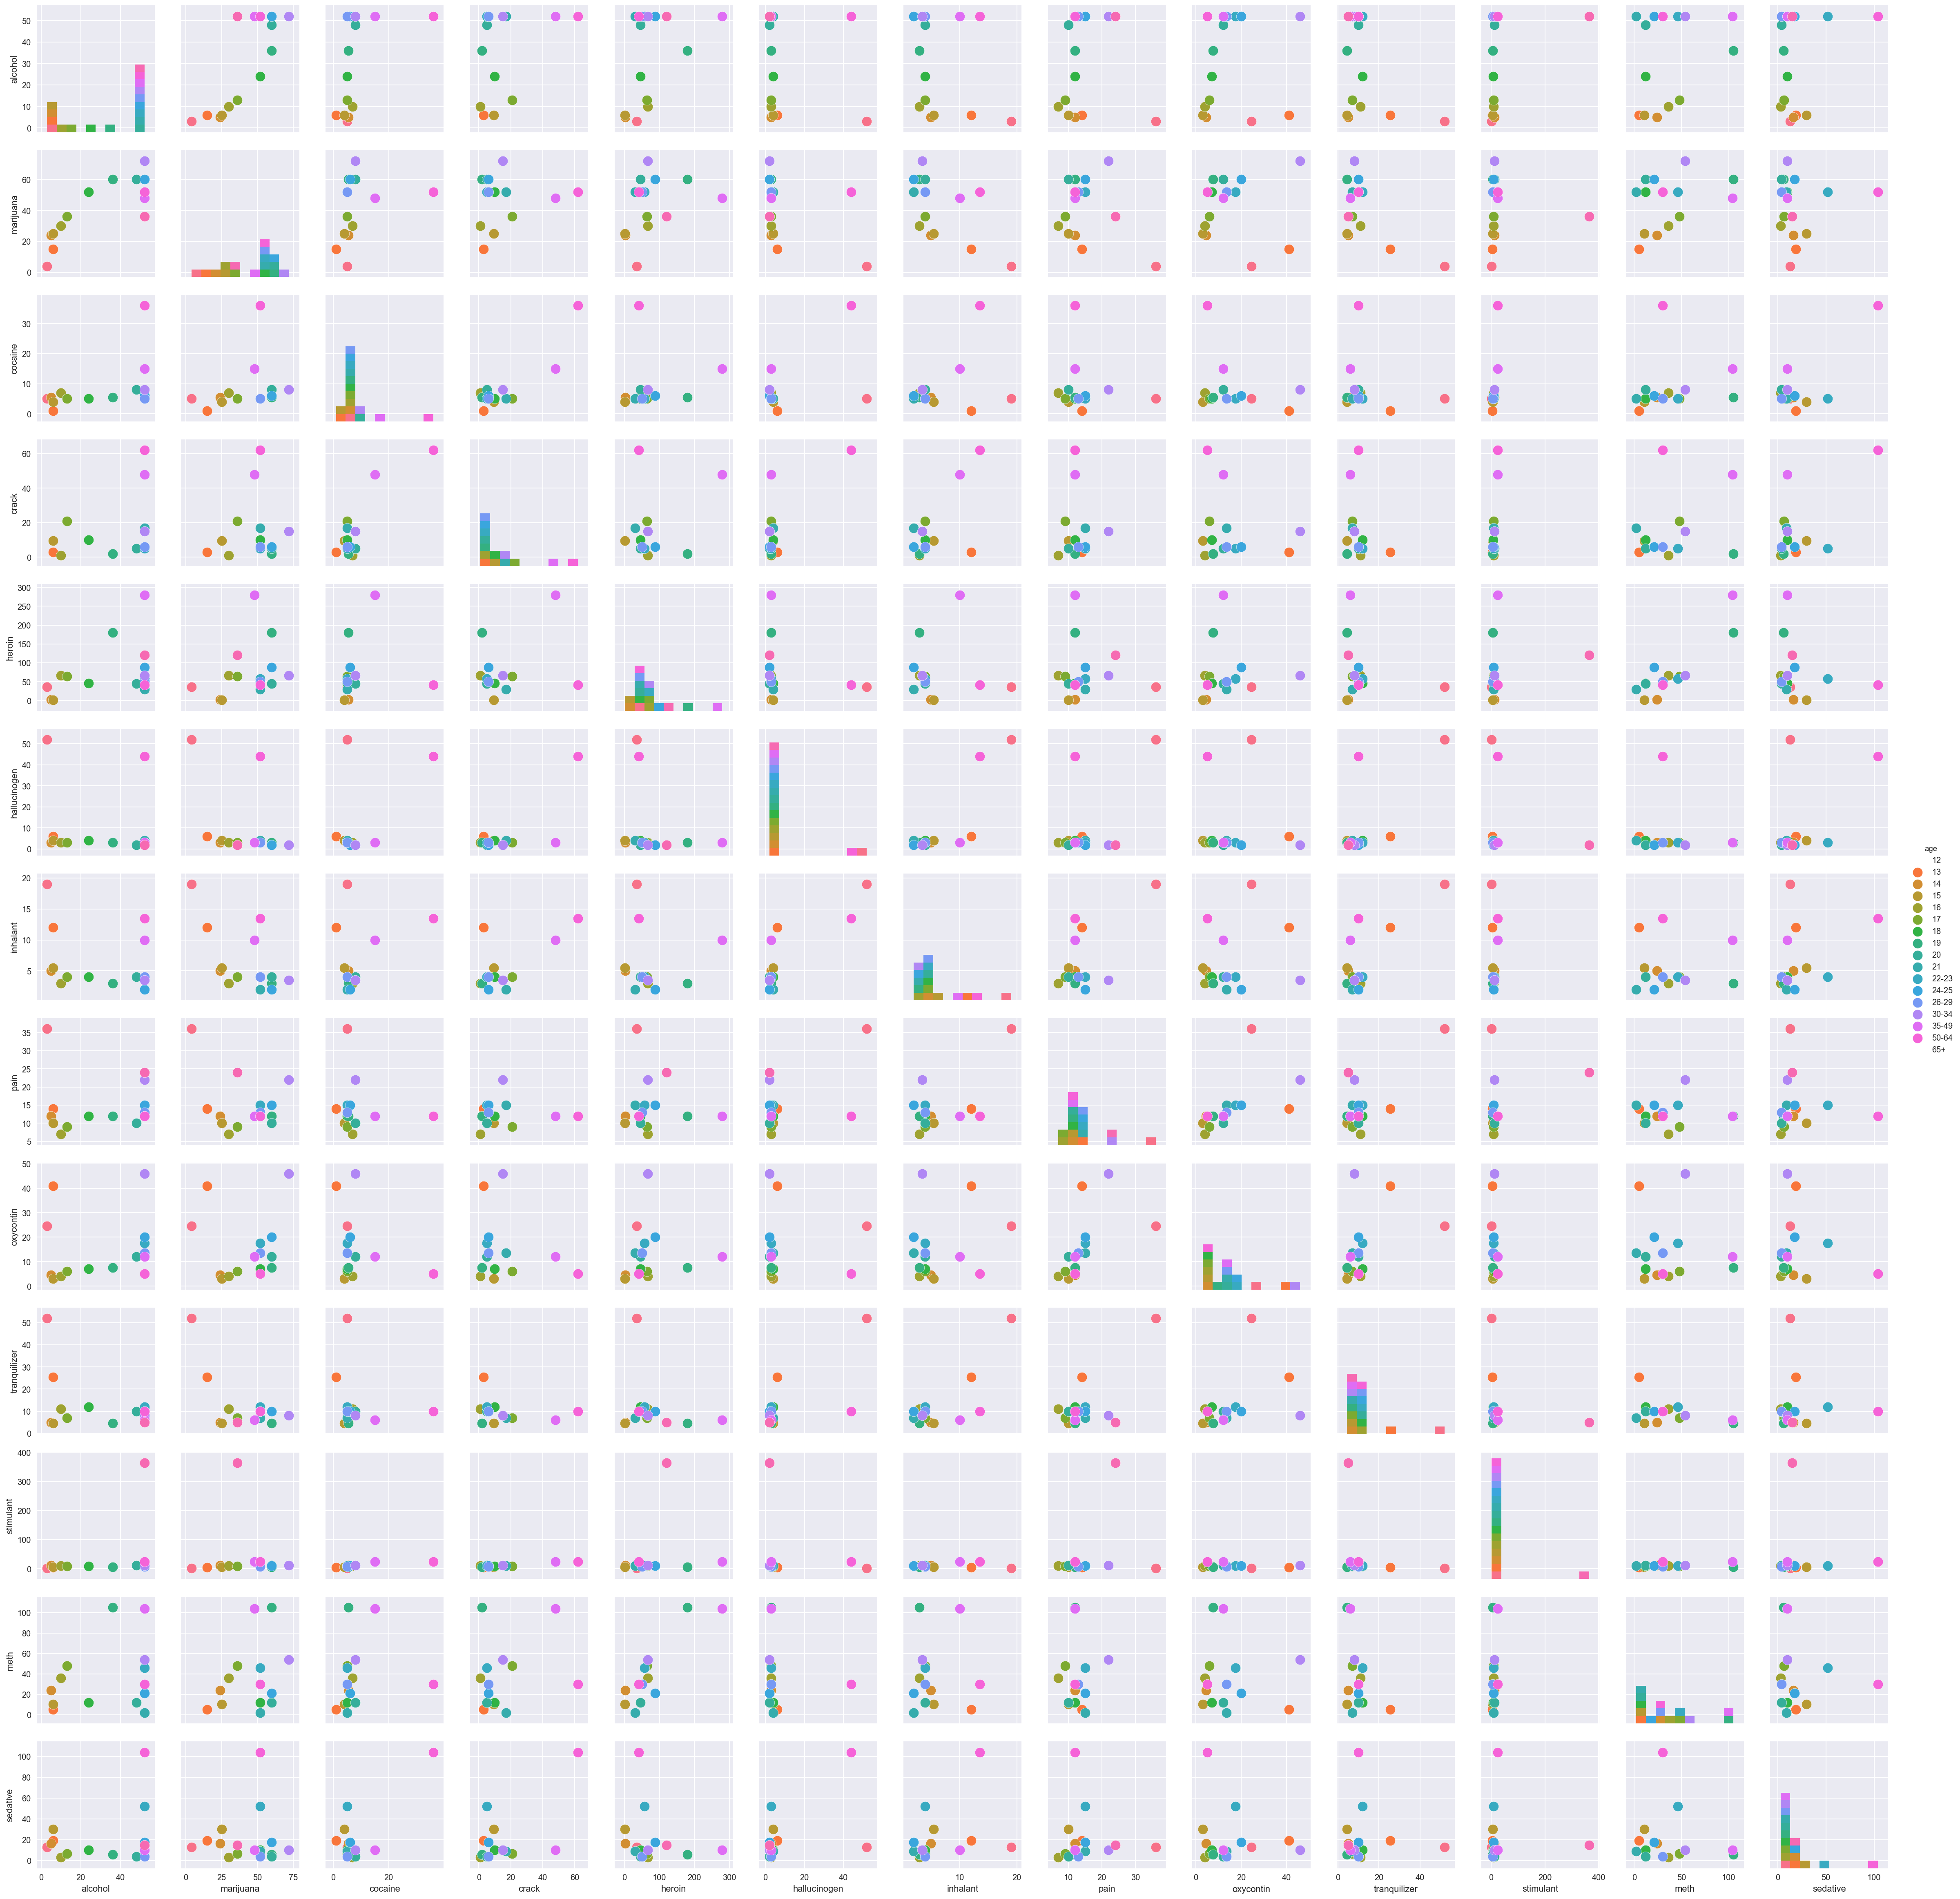

In [41]:
drug_freq = drug[['age_num','age']+freq_cols]
drug_freq.rename(columns={k:k.split('-')[0] for k in freq_cols}, inplace=True)
drug_freq.head()

sns.pairplot(drug_freq, hue='age', vars=[c.split('-')[0] for c in freq_cols],
             kind='scatter', plot_kws={'s':150});

The gist of these charts isn't surprising in the case of illicit drug use:

**Age groups using one drug more often tend to use other drugs more often.** We can see some age "gradients" across age bins with the hues above.

The frequency chart shows there is not as much of a relationship between the fequency of use of one drug with another drug in age groups.

However, this could be due to the scaling of the variable. There are a lot of extreme values in there, and it might be worth to take the logarithm of the frequencies to squish down the higher magnitude values.


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


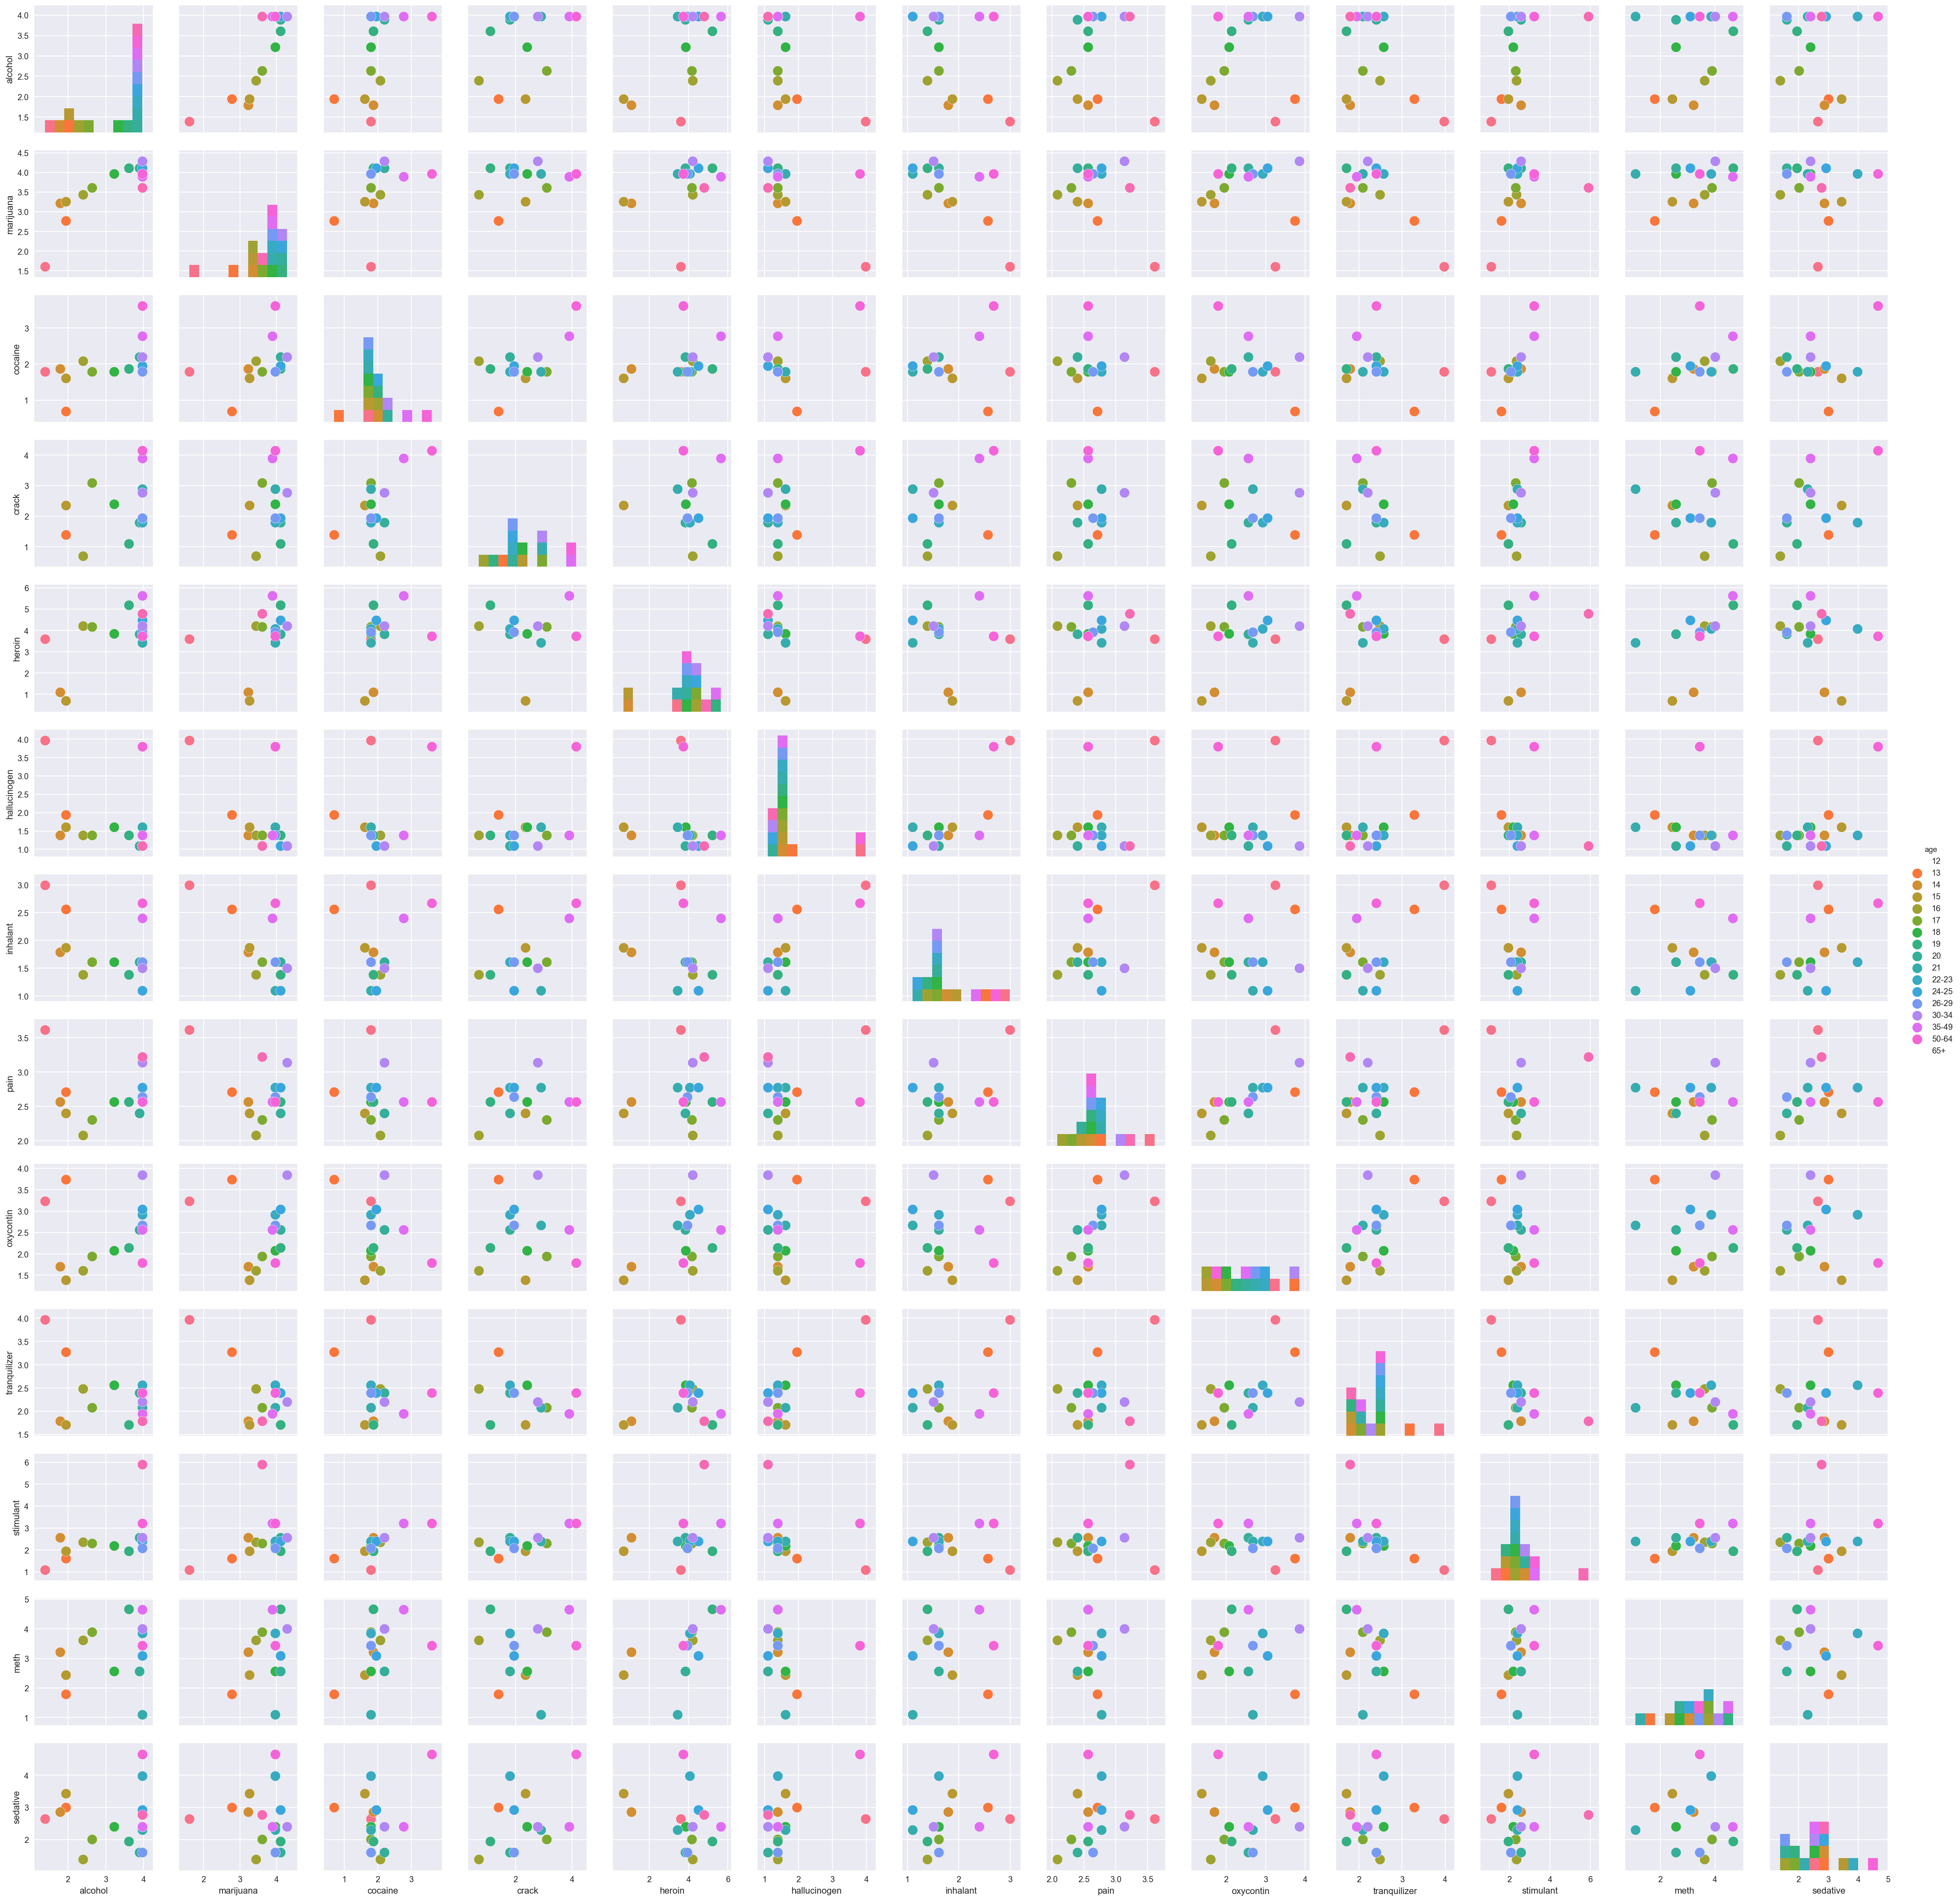

In [42]:
drug_freq_log = drug[['age_num','age']+freq_cols]
drug_freq_log.iloc[:,2:] = drug_freq_log.iloc[:,2:].apply(lambda x: np.log(1+x), axis=0)

drug_freq_log.rename(columns={k:k.split('-')[0] for k in freq_cols}, inplace=True)

sns.pairplot(drug_freq_log, hue='age', vars=[c.split('-')[0] for c in freq_cols],
             kind='scatter', plot_kws={'s':150});

Putting the frequency variables on the logarithmic scale may have helped, but it's hard to say without looking at the correlation matrix. It at least appears somewhat more readable. The strength of relationships between frequency variables are not as strong as in the use variables.

Let's look next at the correlation matrices for use and frequency, as well as the average correlation per drug in each of those with other drugs.

In [43]:
use_corr = drug[use_cols].corr()
use_corr

alcohol-use  marijuana-use  cocaine-use  crack-use  \
alcohol-use           1.000000       0.594165     0.773458   0.877378   
marijuana-use         0.594165       1.000000     0.883789   0.620670   
cocaine-use           0.773458       0.883789     1.000000   0.835727   
crack-use             0.877378       0.620670     0.835727   1.000000   
heroin-use            0.677614       0.711613     0.899944   0.750790   
hallucinogen-use      0.463702       0.959353     0.855668   0.556222   
inhalant-use         -0.648248       0.127336    -0.214609  -0.543499   
pain-releiver-use     0.617523       0.966226     0.906638   0.652764   
oxycontin-use         0.589219       0.971733     0.865626   0.603003   
tranquilizer-use      0.735785       0.935199     0.920430   0.772651   
stimulant-use         0.582241       0.968096     0.923954   0.618008   
meth-use              0.682531       0.870446     0.889353   0.694324   
sedative-use          0.318268       0.616766     0.461914   0.438421   

                   heroin-use  hallucinogen-use  inhalant-use  \
alcohol-use          0.677614          0.463702     -0.648248   
marijuana-use        0.711613          0.959353      0.127336   
cocaine-use          0.899944          0.855668     -0.214609   
crack-use            0.750790          0.556222     -0.543499   
heroin-use           1.000000          0.683674     -0.215961   
hallucinogen-use     0.683674          1.000000      0.173030   
inhalant-use        -0.215961          0.173030      1.000000   
pain-releiver-use    0.805868          0.909333      0.092045   
oxycontin-use        0.775321          0.916777      0.110492   
tranquilizer-use     0.818583          0.862900     -0.103745   
stimulant-use        0.808024          0.940008      0.108381   
meth-use             0.816620          0.780071     -0.059903   
sedative-use         0.333649          0.518700      0.110611   

                   pain-releiver-use  oxycontin-use  tranquilizer-use  \
alcohol-use                 0.617523       0.589219          0.735785   
marijuana-use               0.966226       0.971733          0.935199   
cocaine-use                 0.906638       0.865626          0.920430   
crack-use                   0.652764       0.603003          0.772651   
heroin-use                  0.805868       0.775321          0.818583   
hallucinogen-use            0.909333       0.916777          0.862900   
inhalant-use                0.092045       0.110492         -0.103745   
pain-releiver-use           1.000000       0.976445          0.959283   
oxycontin-use               0.976445       1.000000          0.955081   
tranquilizer-use            0.959283       0.955081          1.000000   
stimulant-use               0.961484       0.947492          0.909784   
meth-use                    0.918051       0.895790          0.936270   
sedative-use                0.636666       0.625929          0.674618   

                   stimulant-use  meth-use  sedative-use  
alcohol-use             0.582241  0.682531      0.318268  
marijuana-use           0.968096  0.870446      0.616766  
cocaine-use             0.923954  0.889353      0.461914  
crack-use               0.618008  0.694324      0.438421  
heroin-use              0.808024  0.816620      0.333649  
hallucinogen-use        0.940008  0.780071      0.518700  
inhalant-use            0.108381 -0.059903      0.110611  
pain-releiver-use       0.961484  0.918051      0.636666  
oxycontin-use           0.947492  0.895790      0.625929  
tranquilizer-use        0.909784  0.936270      0.674618  
stimulant-use           1.000000  0.894757      0.567956  
meth-use                0.894757  1.000000      0.663079  
sedative-use            0.567956  0.663079      1.000000

In [44]:
# correlations for use across drugs look generally high.
ave_perdrug_use_corr = ((use_corr.sum()-1)/use_corr.shape[0])
print('Average use cor per drug (to use of other drugs): ')
print(ave_perdrug_use_corr)

Average use cor per drug (to use of other drugs): 
alcohol-use          0.481818
marijuana-use        0.709645
cocaine-use          0.692453
crack-use            0.528958
heroin-use           0.605057
hallucinogen-use     0.663034
inhalant-use        -0.081851
pain-releiver-use    0.723256
oxycontin-use        0.710224
tranquilizer-use     0.721295
stimulant-use        0.710014
meth-use             0.690876
sedative-use         0.458967
dtype: float64


In [45]:
freq_corr = drug[freq_cols].corr()
log_freq_corr = drug_freq_log.iloc[:,2:].corr()

log_freq_corr

alcohol  marijuana   cocaine     crack    heroin  hallucinogen  \
alcohol       1.000000   0.849732  0.487410  0.348686  0.621156     -0.344430   
marijuana     0.849732   1.000000  0.380959  0.258610  0.353265     -0.587741   
cocaine       0.487410   0.380959  1.000000  0.637859  0.299498      0.315568   
crack         0.348686   0.258610  0.637859  1.000000  0.000026      0.482533   
heroin        0.621156   0.353265  0.299498  0.000026  1.000000     -0.123309   
hallucinogen -0.344430  -0.587741  0.315568  0.482533 -0.123309      1.000000   
inhalant     -0.432371  -0.665097  0.170047  0.439732 -0.071085      0.785925   
pain          0.002026  -0.402421 -0.102808  0.216197  0.138842      0.363968   
oxycontin     0.193754  -0.095497 -0.308313 -0.080677  0.438394      0.004661   
tranquilizer -0.389925  -0.652632 -0.260847 -0.283171  0.104515      0.614390   
stimulant     0.483993   0.339608  0.762817  0.722890  0.280989     -0.263273   
meth          0.244953   0.345832  0.435515  0.086358  0.525287     -0.117737   
sedative      0.005531  -0.084581  0.271606  0.427675 -0.288427      0.473882   

              inhalant      pain  oxycontin  tranquilizer  stimulant  \
alcohol      -0.432371  0.002026   0.193754     -0.389925   0.483993   
marijuana    -0.665097 -0.402421  -0.095497     -0.652632   0.339608   
cocaine       0.170047 -0.102808  -0.308313     -0.260847   0.762817   
crack         0.439732  0.216197  -0.080677     -0.283171   0.722890   
heroin       -0.071085  0.138842   0.438394      0.104515   0.280989   
hallucinogen  0.785925  0.363968   0.004661      0.614390  -0.263273   
inhalant      1.000000  0.380229   0.136319      0.564729  -0.166312   
pain          0.380229  1.000000   0.705901      0.445513   0.126981   
oxycontin     0.136319  0.705901   1.000000      0.540979  -0.269823   
tranquilizer  0.564729  0.445513   0.540979      1.000000  -0.493010   
stimulant    -0.166312  0.126981  -0.269823     -0.493010   1.000000   
meth          0.066598 -0.059636  -0.101200     -0.355310   0.362387   
sedative      0.428343  0.215328  -0.018209      0.067125   0.144119   

                  meth  sedative  
alcohol       0.244953  0.005531  
marijuana     0.345832 -0.084581  
cocaine       0.435515  0.271606  
crack         0.086358  0.427675  
heroin        0.525287 -0.288427  
hallucinogen -0.117737  0.473882  
inhalant      0.066598  0.428343  
pain         -0.059636  0.215328  
oxycontin    -0.101200 -0.018209  
tranquilizer -0.355310  0.067125  
stimulant     0.362387  0.144119  
meth          1.000000 -0.080027  
sedative     -0.080027  1.000000

In [46]:
# correlations for use across drugs look generally high.
ave_perdrug_freq_corr = ((freq_corr.sum()-1)/freq_corr.shape[0])
ave_perdrug_logfreq_corr = ((log_freq_corr.sum()-1)/log_freq_corr.shape[0])

print('Average frequency cor per drug (to freq of other drugs): ')
print(ave_perdrug_freq_corr)

print('Average log frequency cor per drug (to log freq of other drugs): ')
print(ave_perdrug_logfreq_corr)

Average frequency cor per drug (to freq of other drugs): 
alcohol-frequency          0.144154
marijuana-frequency       -0.004442
cocaine-frequency          0.295491
crack-frequency            0.336172
heroin-frequency           0.124940
hallucinogen-frequency     0.229465
inhalant-frequency         0.239587
pain-releiver-frequency    0.175713
oxycontin-frequency        0.045182
tranquilizer-frequency     0.030389
stimulant-frequency        0.180448
meth-frequency             0.127760
sedative-frequency         0.157204
dtype: float64
Average log frequency cor per drug (to log freq of other drugs): 
alcohol         0.159270
marijuana       0.003080
cocaine         0.237639
crack           0.250517
heroin          0.175319
hallucinogen    0.123418
inhalant        0.125927
pain            0.156163
oxycontin       0.088176
tranquilizer   -0.007511
stimulant       0.156259
meth            0.104078
sedative        0.120182
dtype: float64


The logarithmic scaling of the frequency of drug use variables didn't help much. Neither the log nor the original has very strong linear relationships.

Next, let's add some useful variables to the data, including categories and legality of drugs. This makes use of long/wide format data munging.

In [47]:
drug_type = pd.melt(drug, id_vars=['age','age_num','n'])
drug_type.head()

age  age_num     n     variable  value
0  12     12.0  2798  alcohol-use    3.9
1  13     13.0  2757  alcohol-use    8.5
2  14     14.0  2792  alcohol-use   18.1
3  15     15.0  2956  alcohol-use   29.2
4  16     16.0  3058  alcohol-use   40.1

In [48]:
drug_type['drug'] = drug_type.variable.map(lambda x: x.split('-')[0])
drug_type['use_freq'] = drug_type.variable.map(lambda x: x.split('-')[1])
drug_type.head()

age  age_num     n     variable  value     drug use_freq
0  12     12.0  2798  alcohol-use    3.9  alcohol      use
1  13     13.0  2757  alcohol-use    8.5  alcohol      use
2  14     14.0  2792  alcohol-use   18.1  alcohol      use
3  15     15.0  2956  alcohol-use   29.2  alcohol      use
4  16     16.0  3058  alcohol-use   40.1  alcohol      use

In [49]:
drug_type.drug.unique()

array(['alcohol', 'marijuana', 'cocaine', 'crack', 'heroin',
       'hallucinogen', 'inhalant', 'pain', 'oxycontin', 'tranquilizer',
       'stimulant', 'meth', 'sedative'], dtype=object)

Here we categorize drugs as stimulants, sedatives, or hallucinogens.

In [50]:
drug_type.loc[drug_type.drug.isin(['alcohol','heroin','pain','inhalant',
                                   'oxycontin','tranquilizer','sedative']), 'drug_type'] = 'sedative'
drug_type.loc[drug_type.drug.isin(['cocaine','crack','stimulant','meth']), 'drug_type'] = 'stimulant'
drug_type.loc[drug_type.drug.isin(['hallucinogen','marijuana']), 'drug_type'] = 'hallucinogen'

And legal or illegal.

In [51]:
drug_type.loc[drug_type.drug.isin(['alcohol','pain','inhalant','oxycontin','sedative','tranquilizer',
                                   'stimulant']), 
              'legality'] = 'legal'
drug_type.loc[drug_type.drug.isin(['heroin','cocaine','crack','meth','hallucinogen','marijuana']),
              'legality'] = 'illegal'

In [52]:
drug_type.head()

age  age_num     n     variable  value     drug use_freq drug_type legality
0  12     12.0  2798  alcohol-use    3.9  alcohol      use  sedative    legal
1  13     13.0  2757  alcohol-use    8.5  alcohol      use  sedative    legal
2  14     14.0  2792  alcohol-use   18.1  alcohol      use  sedative    legal
3  15     15.0  2956  alcohol-use   29.2  alcohol      use  sedative    legal
4  16     16.0  3058  alcohol-use   40.1  alcohol      use  sedative    legal

In [53]:
drug_type_use = drug_type.loc[drug_type.use_freq == 'use',
                              ['age','age_num','n','value','drug','drug_type','legality']]
drug_type_use.rename(columns={'value':'use_pct'}, inplace=True)

In [54]:
drug_type_freq = drug_type.loc[drug_type.use_freq == 'frequency',
                              ['age','drug','value']]
drug_type_freq.rename(columns={'value':'frequency'}, inplace=True)

In [55]:
print(drug_type_use.shape, drug_type_freq.shape)

(204, 7) (204, 3)


In [56]:
drug_type_pair = drug_type_use.merge(drug_type_freq, on=['drug','age'])

In [57]:
drug_type_pair.shape

(204, 8)

We'll also calculate the log of the variables, in case those are easier to understand in a plot.

In [58]:
def logger(df):
    df['freq_log'] = np.log(1+df.frequency)
    df['use_log'] = np.log(1+df.use_pct)
    return df

drug_type_pair = drug_type_pair.groupby('drug').apply(logger)
drug_type_pair.head()


age  age_num     n  use_pct     drug drug_type legality  frequency  \
0  12     12.0  2798      3.9  alcohol  sedative    legal        3.0   
1  13     13.0  2757      8.5  alcohol  sedative    legal        6.0   
2  14     14.0  2792     18.1  alcohol  sedative    legal        5.0   
3  15     15.0  2956     29.2  alcohol  sedative    legal        6.0   
4  16     16.0  3058     40.1  alcohol  sedative    legal       10.0   

   freq_log   use_log  
0  1.386294  1.589235  
1  1.945910  2.251292  
2  1.791759  2.949688  
3  1.945910  3.407842  
4  2.397895  3.716008

Long format data can make plotting much easier: we now have numerical columns of use and frequency values, and various categorical variables which we can represent with hues.

First plot the use percent against the age, with a hue for the drug.

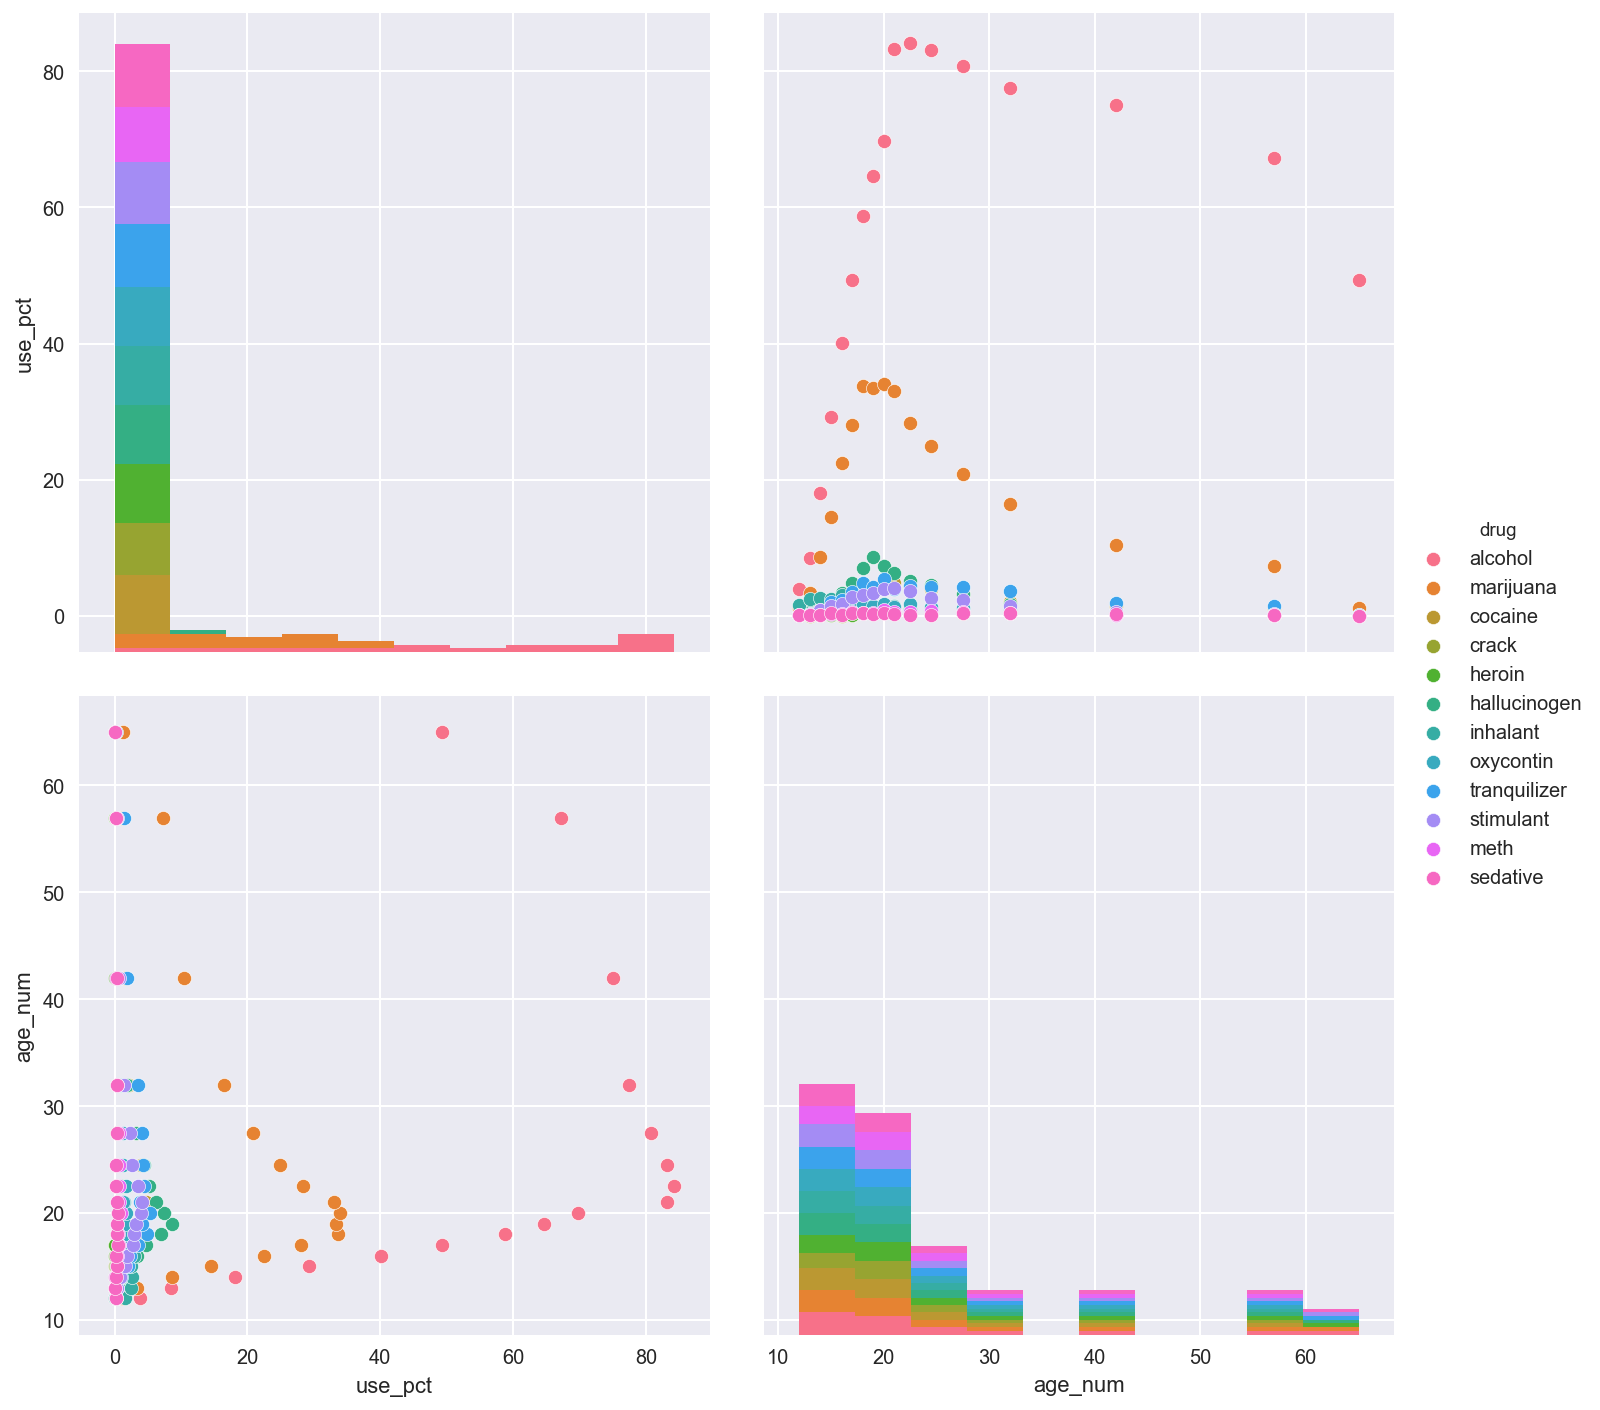

In [59]:
pair_nonan = drug_type_pair.dropna()
sns.pairplot(pair_nonan, vars=["use_pct","age_num"], hue='drug',
             size=5, plot_kws={'s':50});

Alcohol and marijuana dominate the charts. If we put it on the log scale we can see more of the differentiation between different drugs:

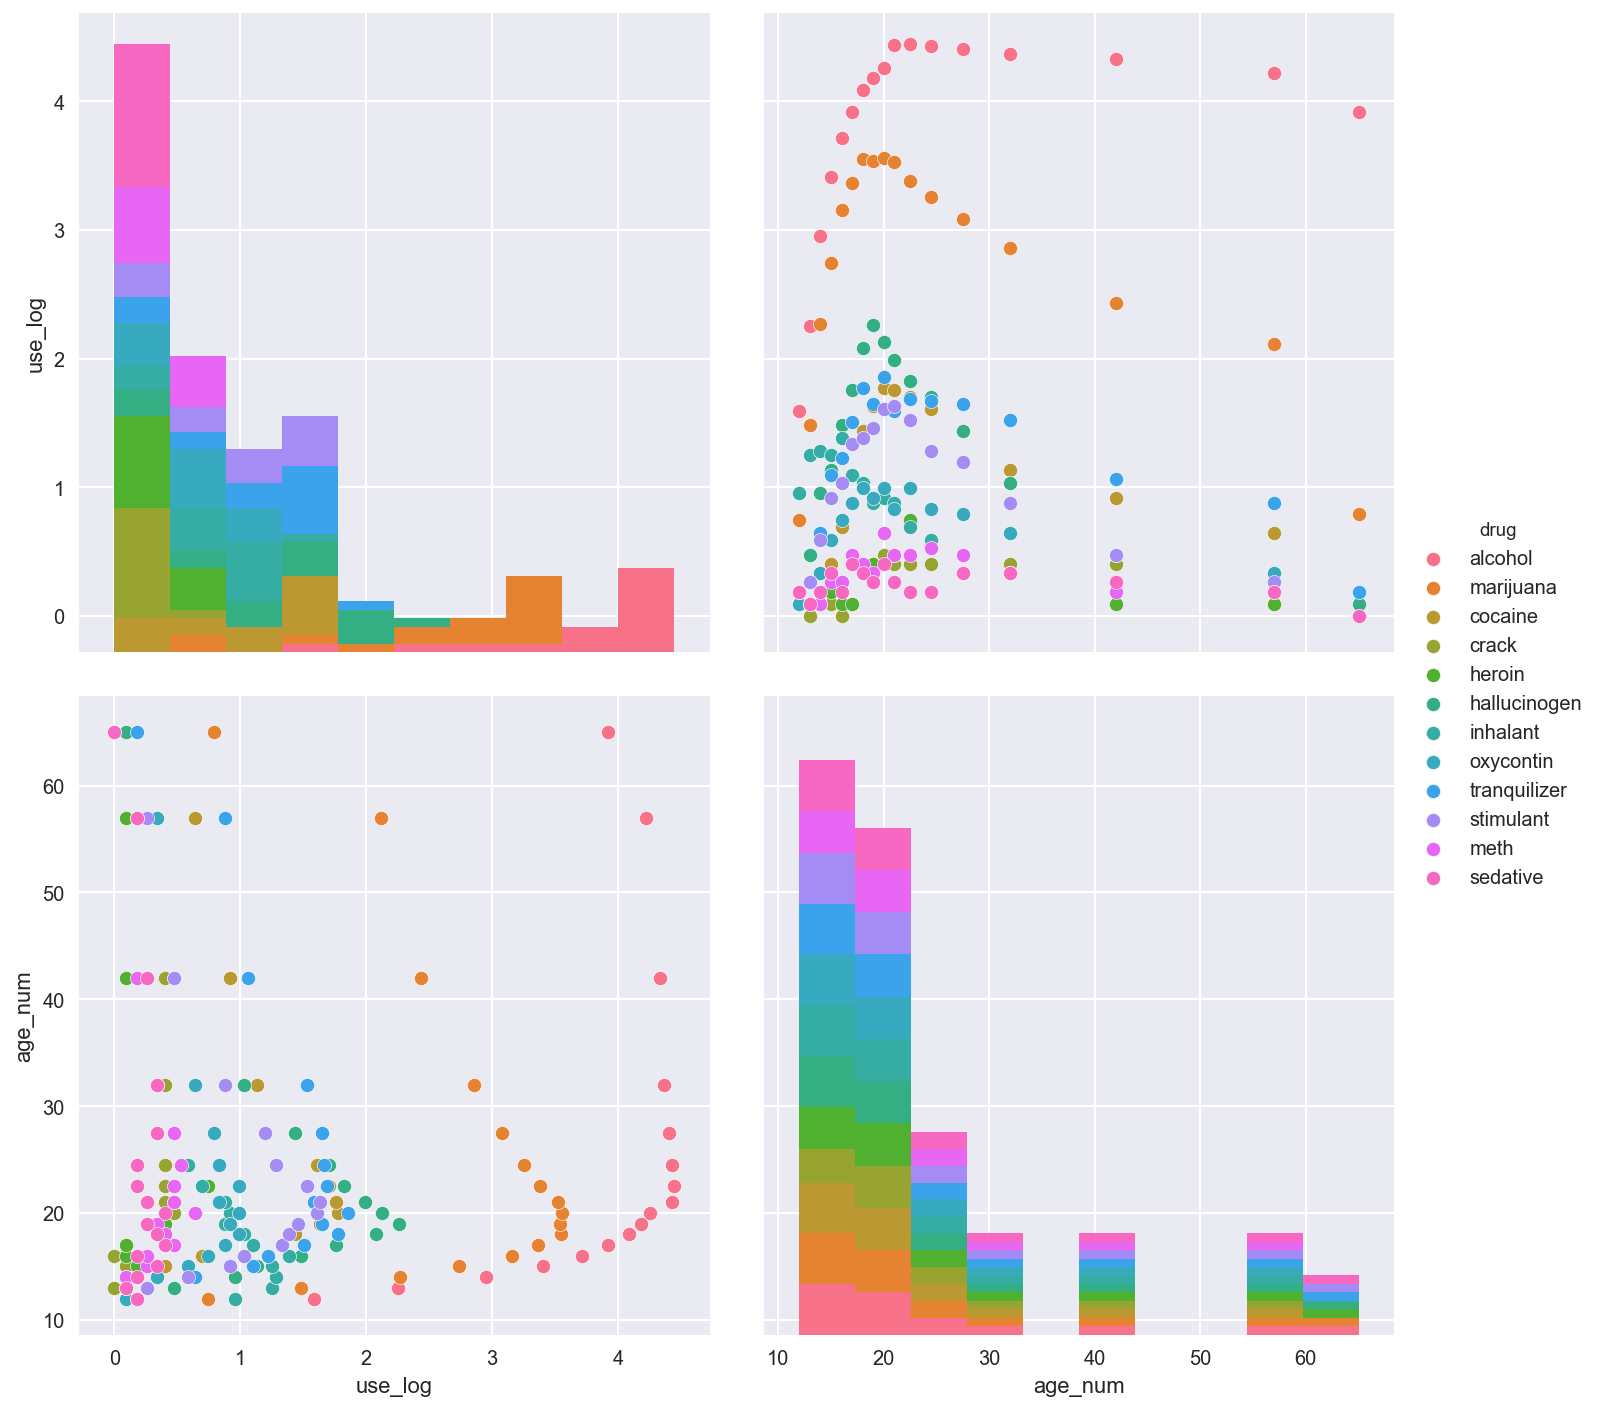

In [60]:
pair_nonan = drug_type_pair.dropna()
sns.pairplot(pair_nonan, vars=["use_log","age_num"], hue='drug',
             size=5, plot_kws={'s':50});

Below is the log of use percent against age, with a color for legality -- nothing stands out here.

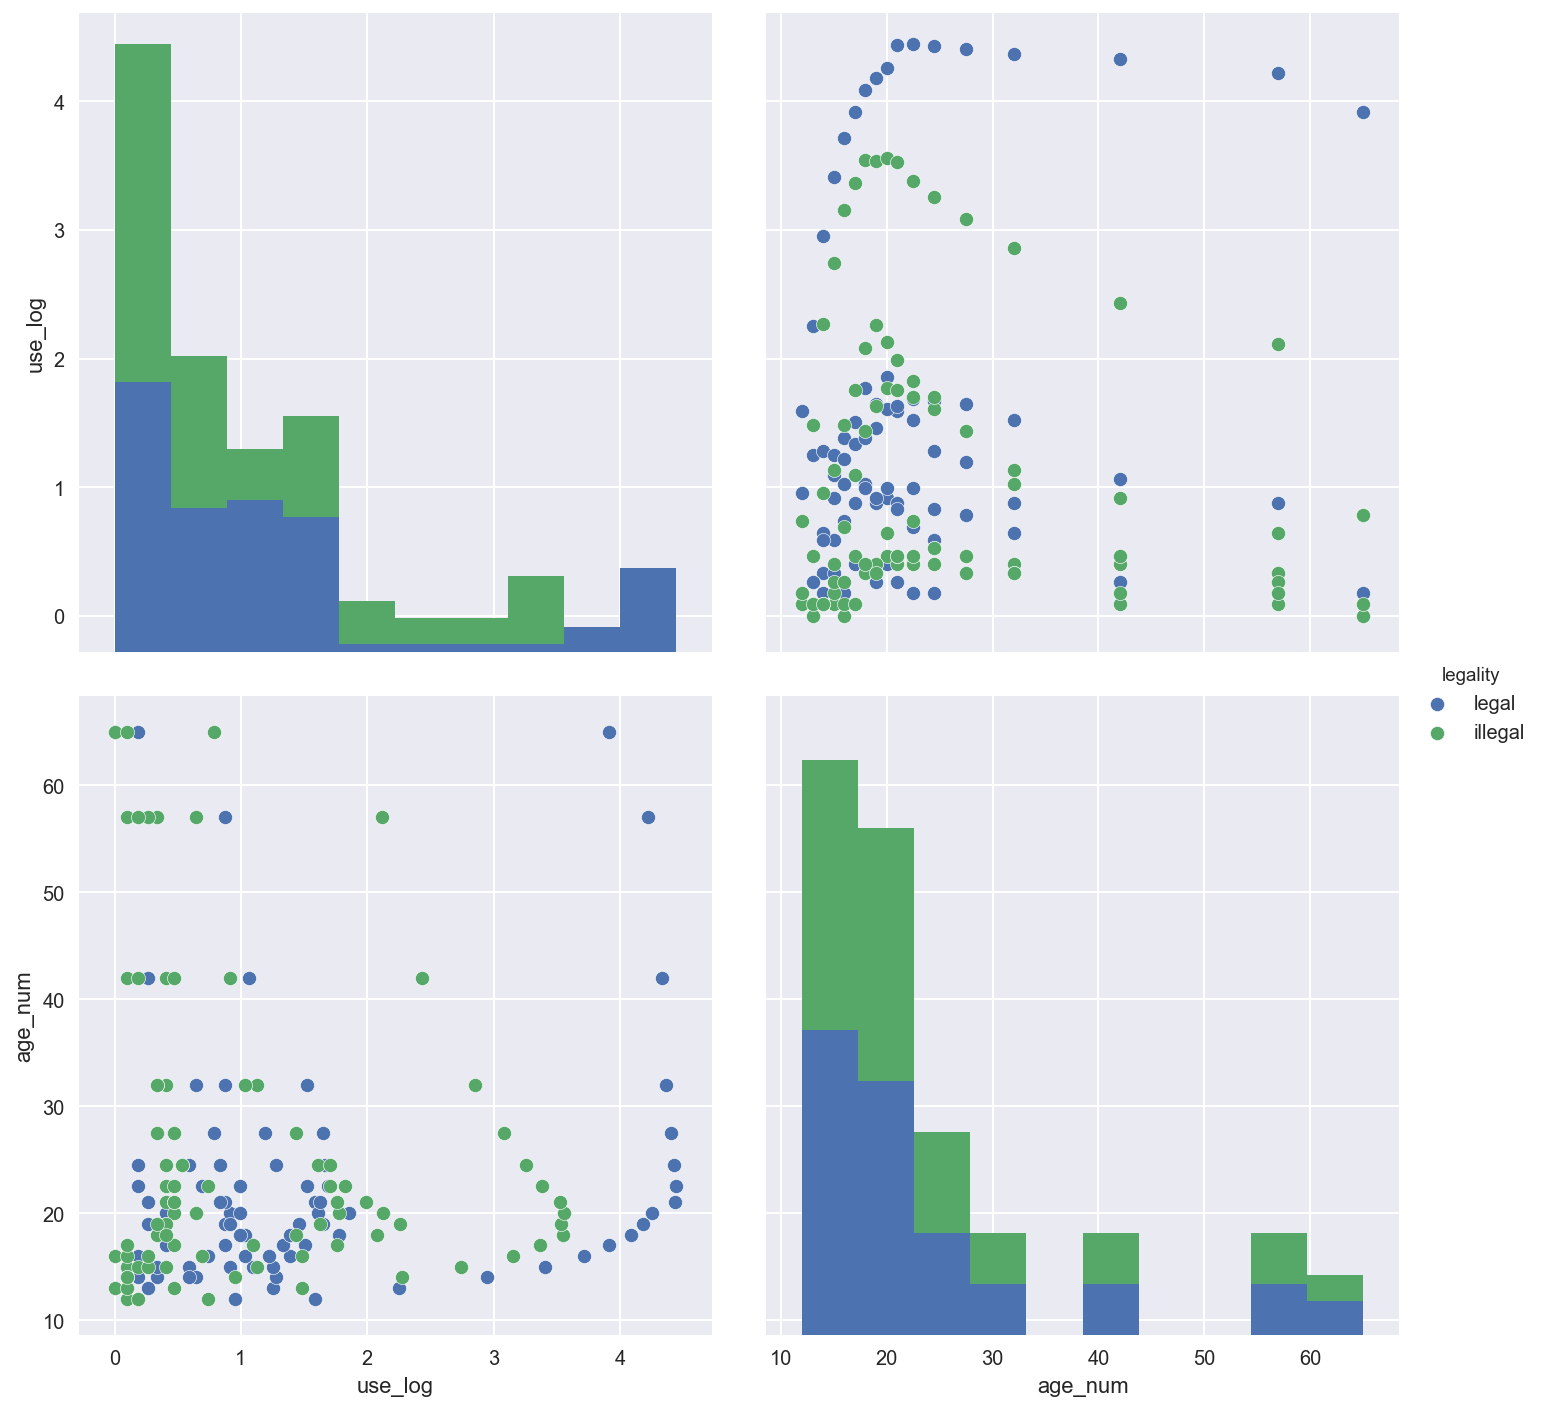

In [61]:
sns.pairplot(pair_nonan, vars=["use_log","age_num"], hue='legality',
             size=5, plot_kws={'s':50});

Here is the same chart, but categorized by type of drug. Not any obvious new information here either.

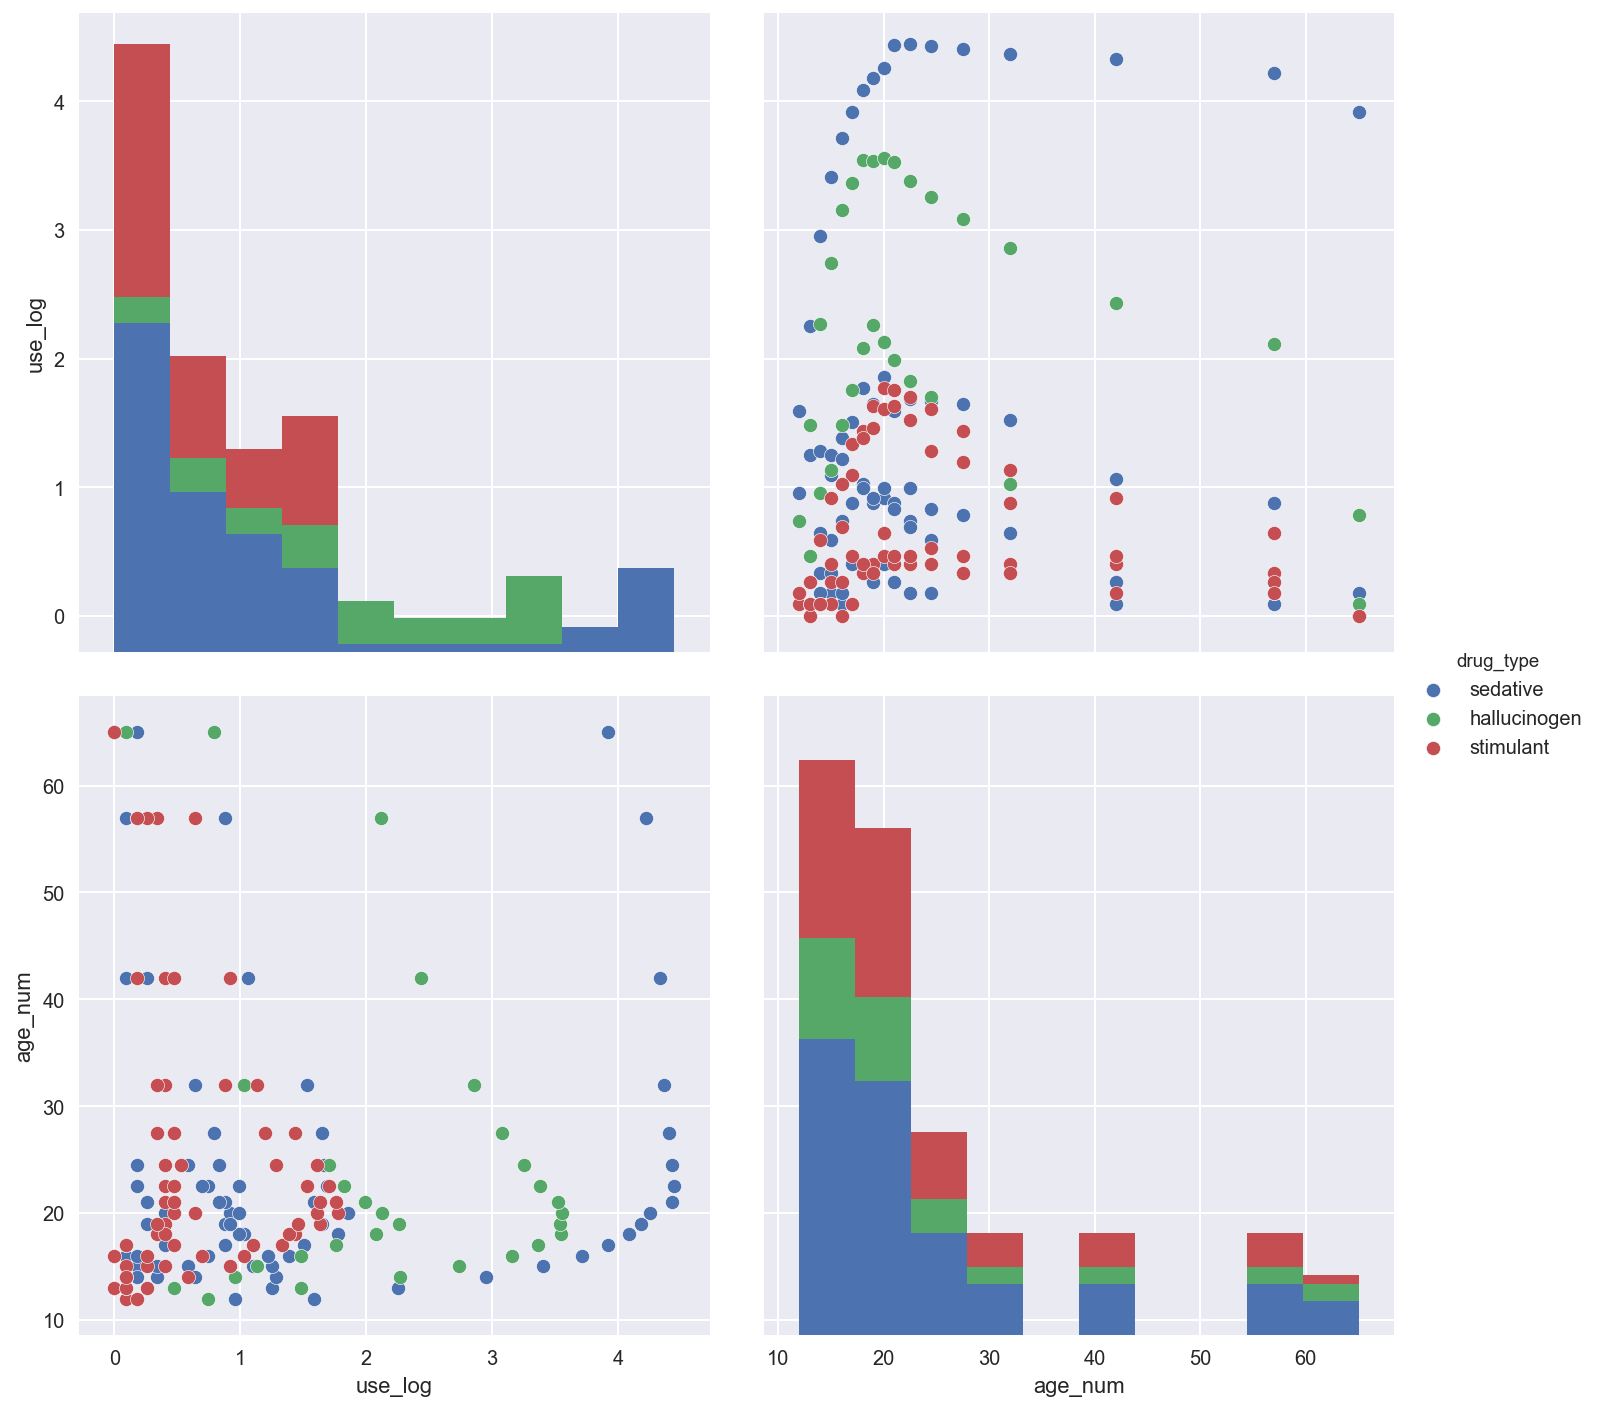

In [62]:
sns.pairplot(pair_nonan, vars=["use_log","age_num"], hue='drug_type',
             size=5, plot_kws={'s':50});

Here is a pairplot of the log of frequency against the log of use (across ages by drugs). There is a statistically significant correlation, though low and perhaps driven by a subset of the drugs.

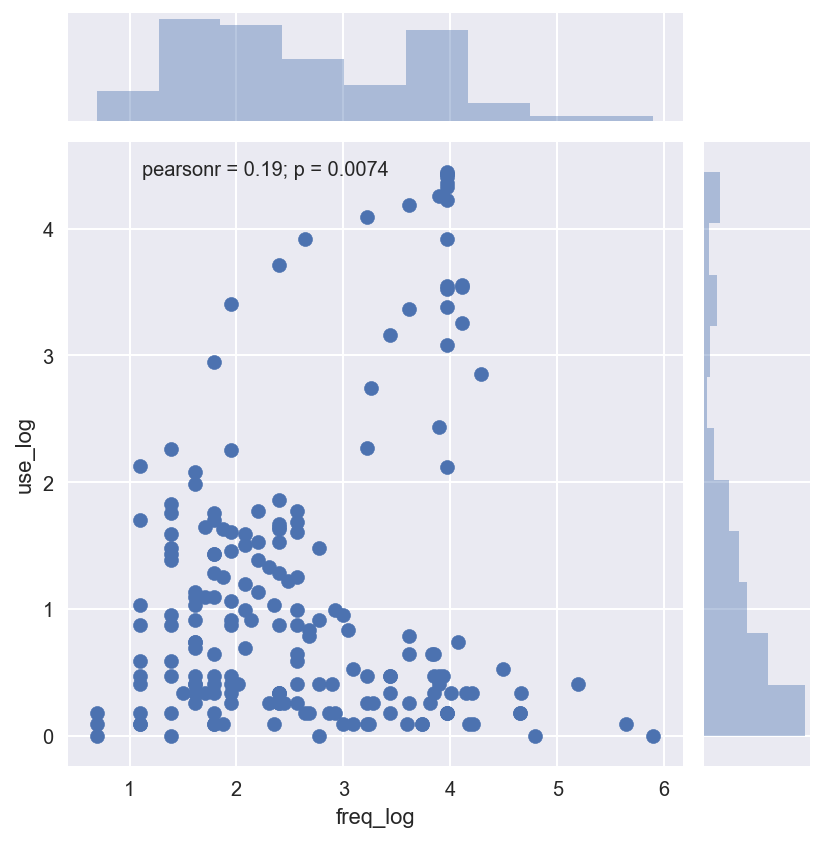

In [63]:
sns.jointplot(x="freq_log", y="use_log", data=pair_nonan);

There is a reasonably strong correlation between age increasing and the frequency of drug use increasing. We noticed this earlier: the proportion of people using drugs drops off with age, but those who use them at older ages are doing so frequently.

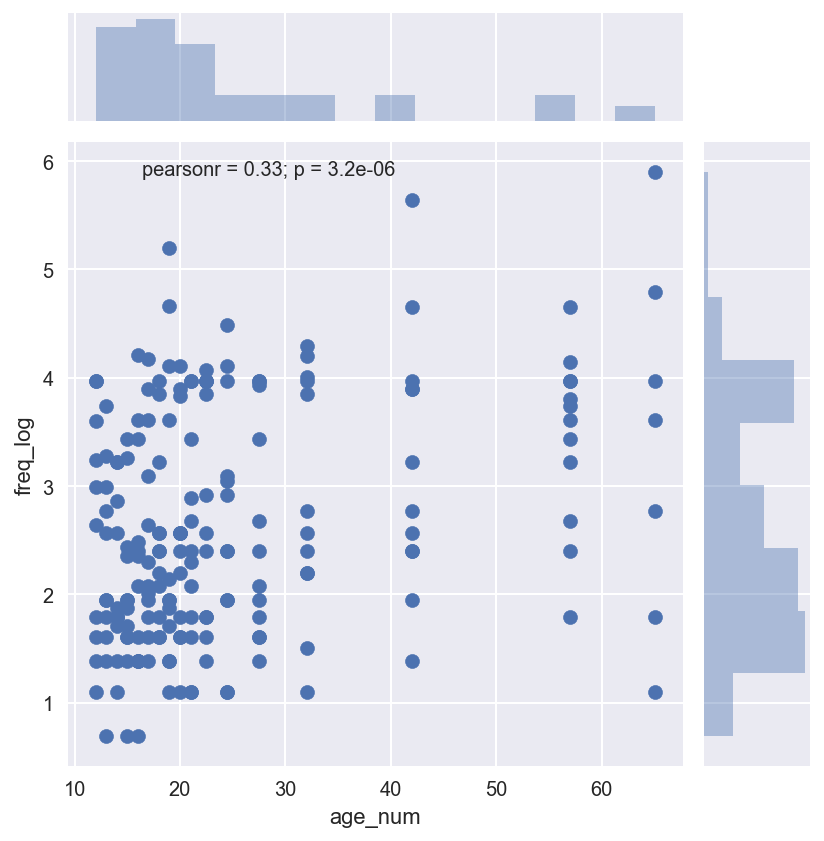

In [64]:
sns.jointplot(x="age_num", y="freq_log", data=pair_nonan);

Here is age against the log of use percent. This is a good example of the correlation measure failing to tell the whole story.

The r is close to zero, which would suggest there is no correlation, but if you look at this data you can see that there are really two "stages" here. As age goes from pre-teens to early 20s, drug use increases with age increase across the board. Then after the early 20s, drug use _decreases_ with age increase.

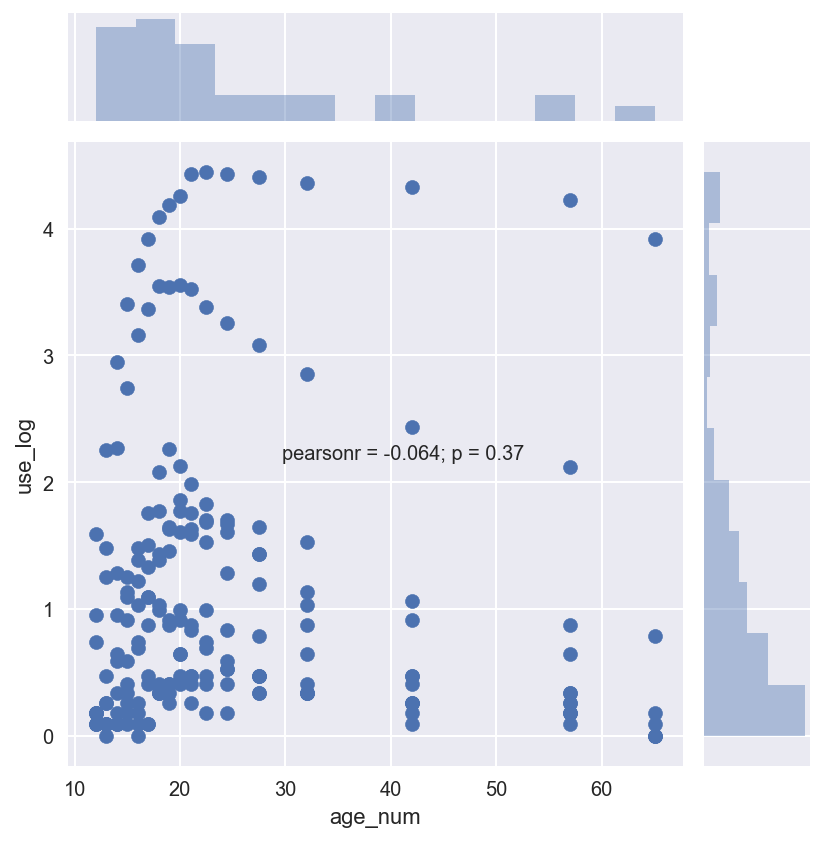

In [65]:
sns.jointplot(x="age_num", y="use_log", data=pair_nonan);

If you just take the ages less than or equal to 21, now the correlation is significantly positive.

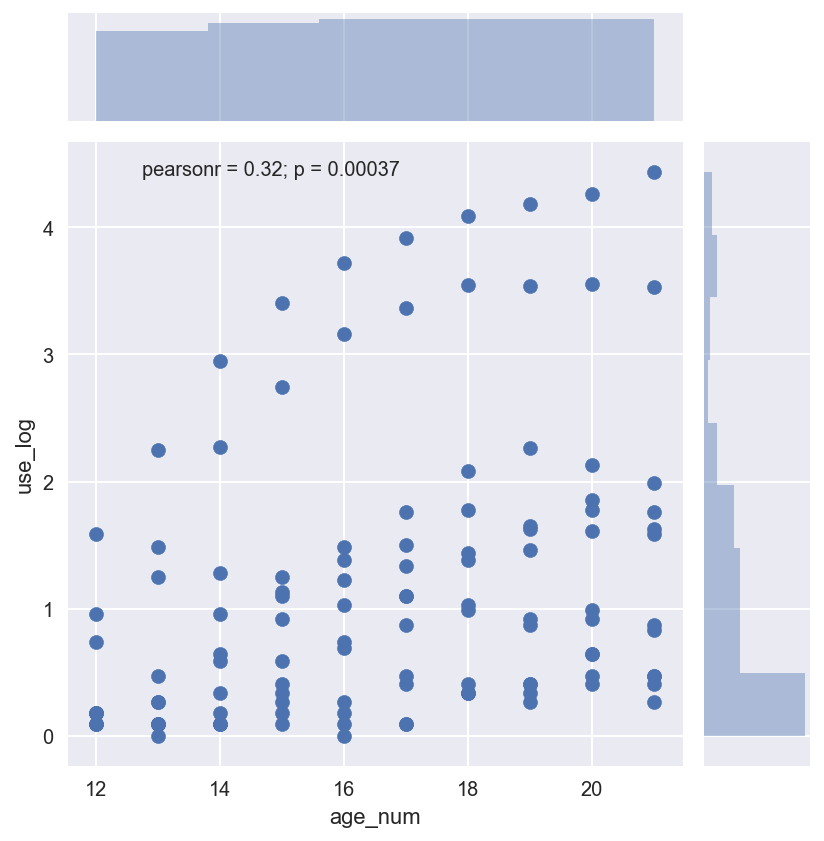

In [66]:
sns.jointplot(x="age_num", y="use_log", data=pair_nonan[pair_nonan.age_num <= 21]);

If you take ages over 21, now the correlation is (not quite) significantly negative.

It is important to actually _look_ at your data!

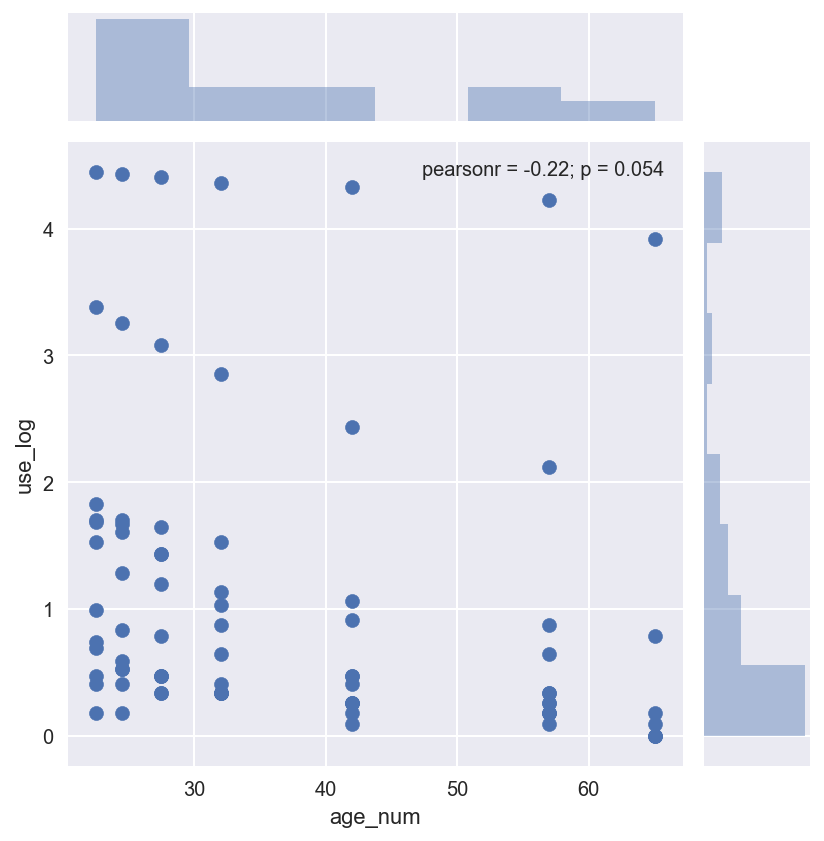

In [67]:
sns.jointplot(x="age_num", y="use_log", data=pair_nonan[pair_nonan.age_num > 21]);

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.

Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!


**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

---

**Hypothesis**:

The ratio of frequency of use to percentage of users negatively correlates with age. However, this ratio will positively correlate with the addictiveness of the drug.

**Deliverables**:

- Calculate the ratio of frequency of use : use percentage. 
- Make a plot of the ratio against age and calculate the correlation.
- Plot the ratio against their "addictiveness", based on reports of addictiveness found online. Calculate the correlation as well.

In [68]:
pair_nonan.head()

age  age_num     n  use_pct     drug drug_type legality  frequency  \
0  12     12.0  2798      3.9  alcohol  sedative    legal        3.0   
1  13     13.0  2757      8.5  alcohol  sedative    legal        6.0   
2  14     14.0  2792     18.1  alcohol  sedative    legal        5.0   
3  15     15.0  2956     29.2  alcohol  sedative    legal        6.0   
4  16     16.0  3058     40.1  alcohol  sedative    legal       10.0   

   freq_log   use_log  
0  1.386294  1.589235  
1  1.945910  2.251292  
2  1.791759  2.949688  
3  1.945910  3.407842  
4  2.397895  3.716008

Make a new DataFrame to calculate the ratio of frequency to use_pct. Remove any rows where use_pct is 0, since you can't divide by zero (you'll get infinity).

In [69]:
ratio = pair_nonan[['age','age_num','drug','use_pct','frequency']]
ratio = ratio[~(ratio.use_pct == 0)]
ratio['freq_use_ratio'] = ratio.frequency/ratio.use_pct


In [70]:
ratio.head()

age  age_num     drug  use_pct  frequency  freq_use_ratio
0  12     12.0  alcohol      3.9        3.0        0.769231
1  13     13.0  alcohol      8.5        6.0        0.705882
2  14     14.0  alcohol     18.1        5.0        0.276243
3  15     15.0  alcohol     29.2        6.0        0.205479
4  16     16.0  alcohol     40.1       10.0        0.249377

Plot of freq_use_ratio against age:

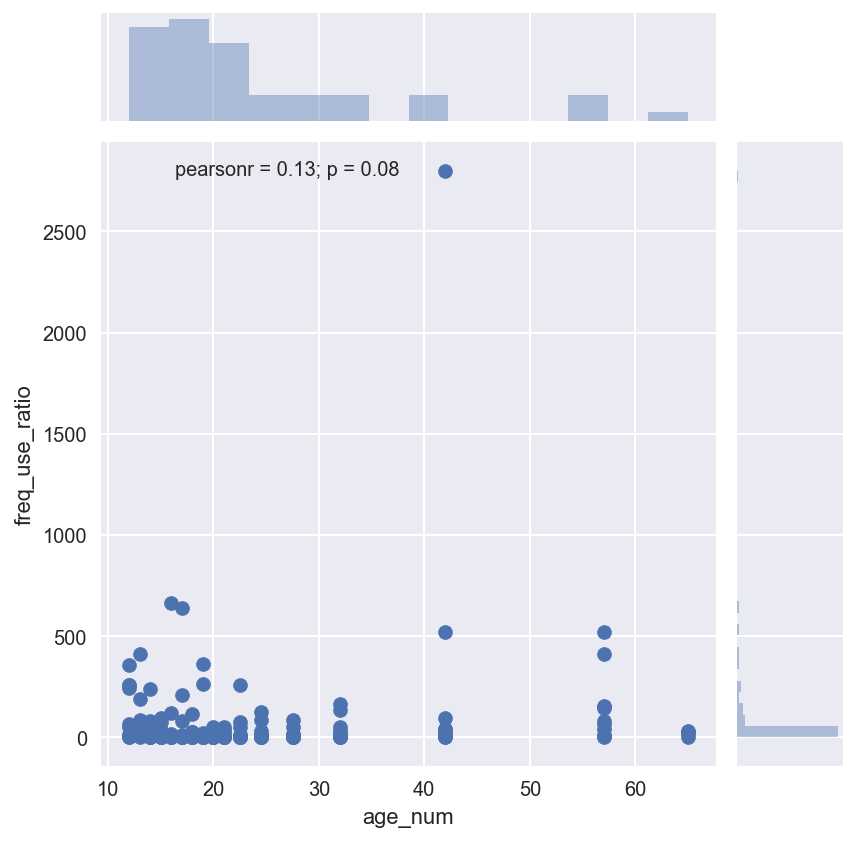

In [71]:
sns.jointplot(x="age_num", y="freq_use_ratio", data=ratio);

It looks like there is a pretty crazy outlier in there. Which group and drug has the ratio up over 2500?

In [72]:
ratio[ratio.freq_use_ratio > 2500]

age  age_num    drug  use_pct  frequency  freq_use_ratio
82  35-49     42.0  heroin      0.1      280.0          2800.0

What is the relationship when the outlier is removed?

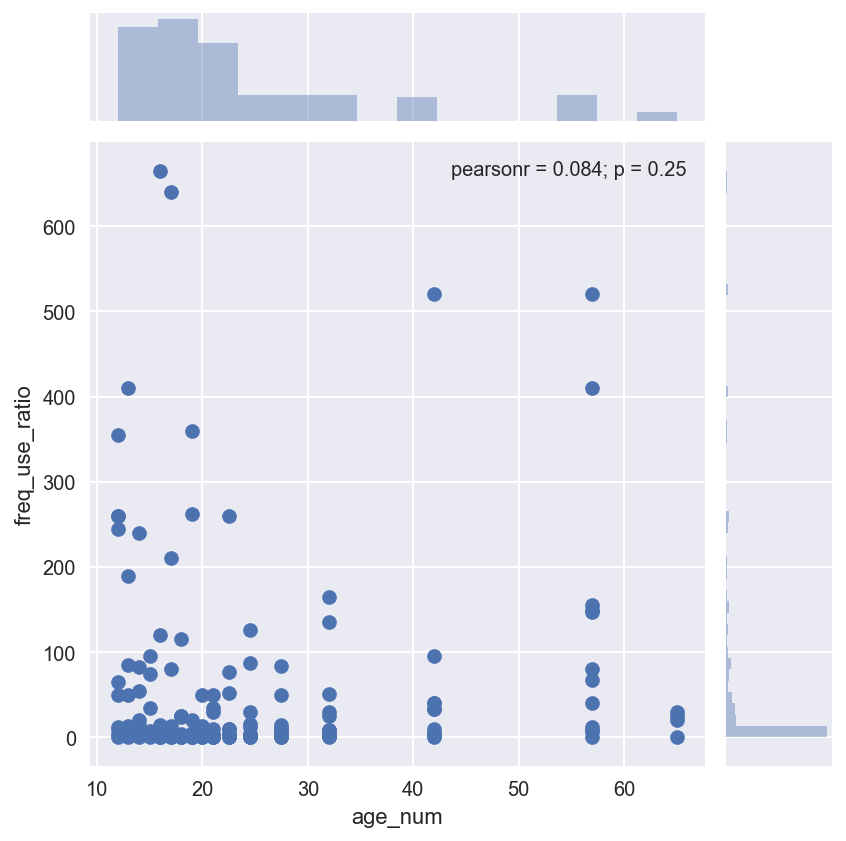

In [73]:
sns.jointplot(x="age_num", y="freq_use_ratio", data=ratio[~(ratio.freq_use_ratio > 2500)]);

Here is a loose "addictiveness ranking" measure. Not based on real science - no idea if the ranking is actually correct.

In [74]:
drug_addictiveness = {
    'heroin':12,
    'crack':11,
    'meth':10,
    'cocaine':9,
    'oxycontin':8,
    'sedative':7,
    'stimulant':6,
    'alcohol':5,
    'tranquilizer':4,
    'inhalant':3,
    'marijuana':2,
    'hallucinogen':1
}

In [75]:
ratio['addictiveness'] = ratio.drug.map(lambda x: drug_addictiveness[x])

In [76]:
ratio.head()

age  age_num     drug  use_pct  frequency  freq_use_ratio  addictiveness
0  12     12.0  alcohol      3.9        3.0        0.769231              5
1  13     13.0  alcohol      8.5        6.0        0.705882              5
2  14     14.0  alcohol     18.1        5.0        0.276243              5
3  15     15.0  alcohol     29.2        6.0        0.205479              5
4  16     16.0  alcohol     40.1       10.0        0.249377              5

Plot the frequency to use ratio against the addictiveness ranking (still excluding the outlier).

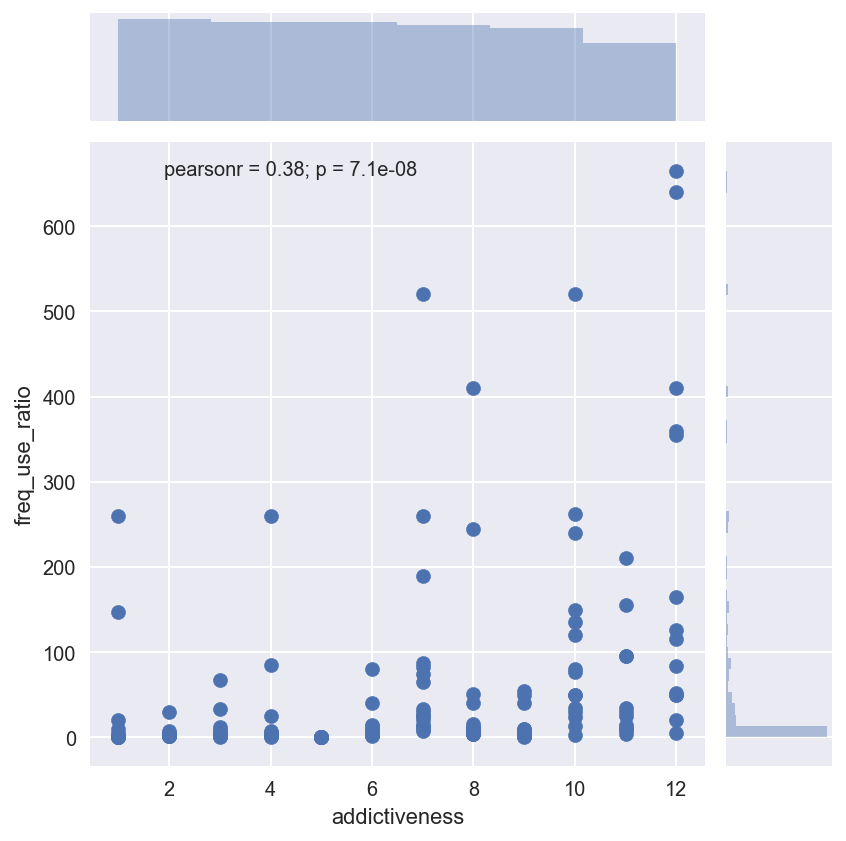

In [77]:
sns.jointplot(x="addictiveness", y="freq_use_ratio", data=ratio[~(ratio.freq_use_ratio > 2500)]);

**Report**

Our hypothesis that frequency of drug use to percent of drug users would negatively correlate was rejected. There is a linear relationship that trends positive but is not significant. We imagined that younger age groups would have fewer overall drug users, but those drug users would be more frequent users. It turned out this is not in the data. The correlation between these variables was r = 0.084 with p = 0.25, after removing one extreme outlier.

However, we do not reject the hypothesis that addictiveness of the drug would have a positive correlation with the frequency to use ratio. These variables had a correlation of r = 0.38 with p = 7.1e-08. We can confidently say -- assuming the addictiveness scale was correct -- that, based on this data, a more addictive drug will be used with higher frequency by less of the population.

We could consider a policy initiative to target abuse of the most addictive drugs by community members of all ages.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [78]:
rate = sat.Rate.values

We could define outliers as any value where `abs(value - mean) >= standard deviation of the variables * 3.5`, for example. 

Standard deviation windows/thresholds are a basic method for dealing with outliers. It is useful but can give unintended results when distributions are badly skewed or otherwise non-normal.

In [79]:
threshold = 3.5*np.std(rate)
rate_mean = np.mean(rate)
outlier_count = np.sum(np.abs(rate - rate_mean) >= threshold)
print(outlier_count)

0


At threshold 3.5 standard deviations, we don't have any outliers. We can show this window on the plot below:

In [80]:
a = stats.iqr(rate,rng=(25,75))

In [81]:
b = stats.iqr(rate[(rate>stats.scoreatpercentile(rate,50))&(rate<stats.scoreatpercentile(rate,75))])

In [82]:
np.median(rate)+a,np.median(rate)-a

(88.0, -22.0)

In [83]:
rate.min()

4

In [84]:
np.median(rate)+1.5*a

115.5

In [85]:
np.median(rate)+stats.iqr(rate,rng=(50,75))

64.0

In [86]:
np.median(rate)-1.5*stats.iqr(rate,rng=(25,50))

-3.0

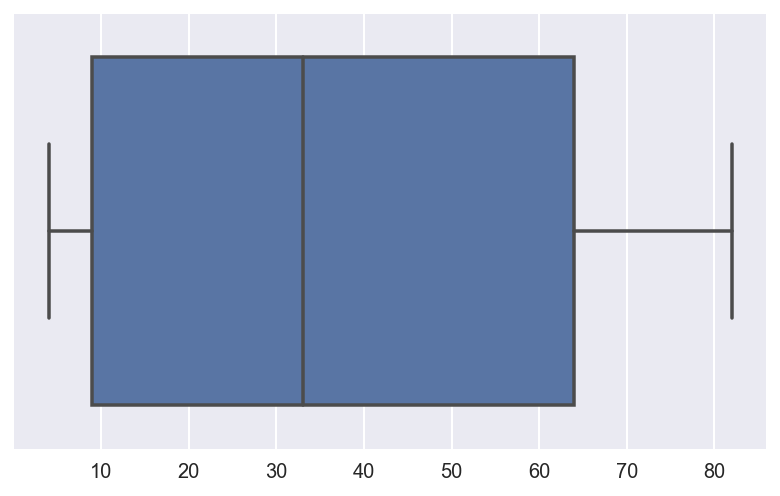

In [87]:
sns.boxplot(rate,whis=1.5);

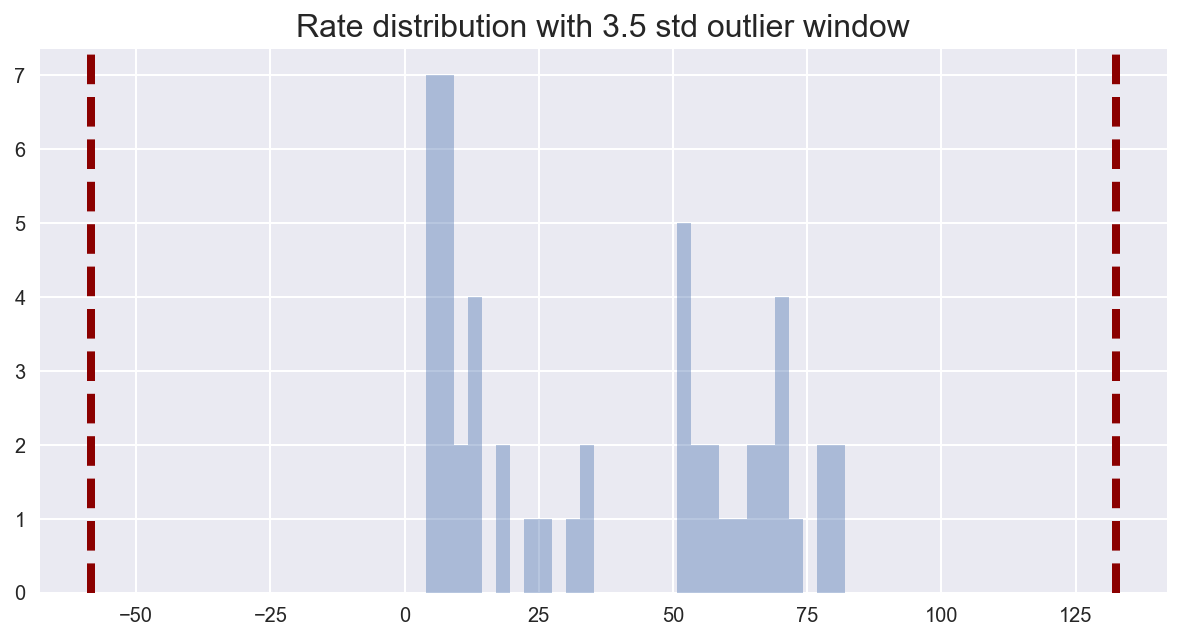

In [88]:
fig = plt.figure(figsize=(9,5))
ax = fig.gca()

ax = sns.distplot(rate, kde=False, bins=30, ax=ax)

rate_mean = np.mean(rate)
lower_bound = rate_mean - threshold
upper_bound = rate_mean + threshold

ax.axvline(lower_bound, linewidth=4, color='darkred', linestyle='dashed')
ax.axvline(upper_bound, linewidth=4, color='darkred', linestyle='dashed')

ax.set_title('Rate distribution with 3.5 std outlier window', fontsize=16)

plt.show()

We could make the threshold 1.25 standard deviations instead and see what happens. (A ridiculous threshold for outliers - would never actually be used).

In [89]:
strict_threshold = 1.25*np.std(rate)
outlier_count = np.sum(np.abs(rate - rate_mean) >= strict_threshold)
print(outlier_count)
print(rate[(np.abs(rate - rate_mean) >= strict_threshold)])

5
[82 81 79 77 72]


Our outliers appear to be on the upper end of the rate variable.

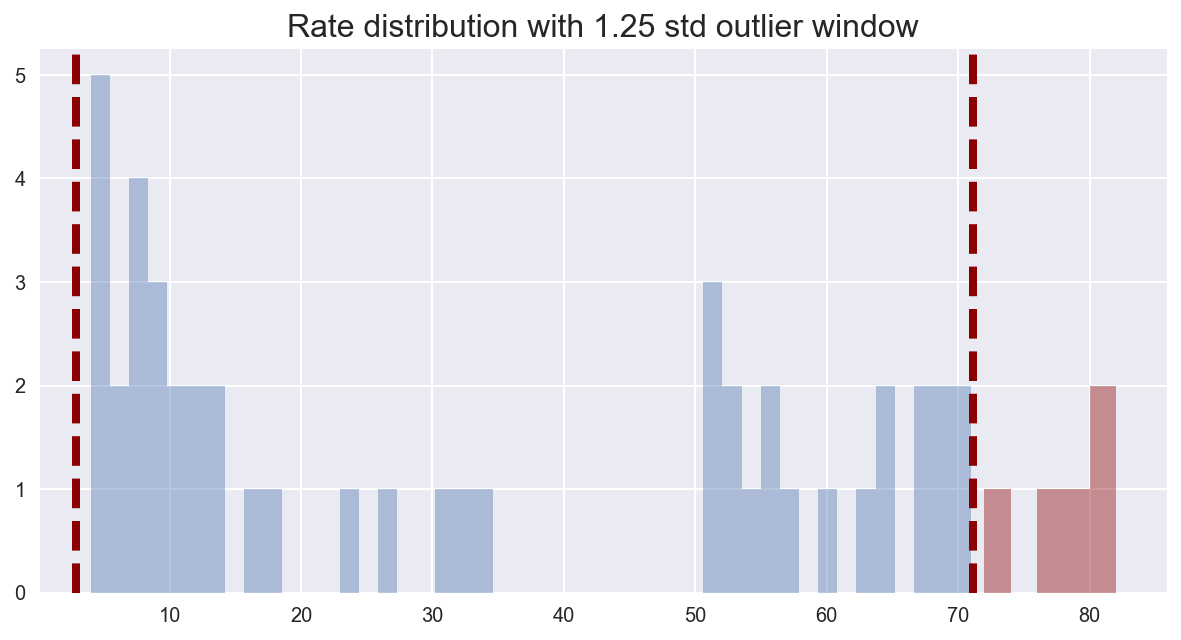

In [90]:
fig = plt.figure(figsize=(9,5))
ax = fig.gca()

non_outliers = rate[(np.abs(rate - rate_mean) < strict_threshold)]
outliers = rate[(np.abs(rate - rate_mean) >= strict_threshold)]

ax = sns.distplot(non_outliers, kde=False, 
                  bins=len(non_outliers), ax=ax)

ax = sns.distplot(outliers, kde=False, 
                  bins=len(outliers), ax=ax, color='darkred')

rate_mean = np.mean(rate)
lower_bound = rate_mean - strict_threshold
upper_bound = rate_mean + strict_threshold

ax.axvline(lower_bound, linewidth=4, color='darkred', linestyle='dashed')
ax.axvline(upper_bound, linewidth=4, color='darkred', linestyle='dashed')

ax.set_title('Rate distribution with 1.25 std outlier window', fontsize=16)

plt.show()

Print the mean, median, and std for both:

In [91]:
print('Original mean, median, std:', [np.mean(rate), np.median(rate), np.std(rate)])
print('Bounded mean, median, std:', [np.mean(non_outliers), np.median(non_outliers), np.std(non_outliers)])

Original mean, median, std: [37.0, 33.0, 27.27923867605359]
Bounded mean, median, std: [32.52173913043478, 24.5, 24.882103862567558]


By cutting out the outliers, which happen to all be on our larger end, we've reduced the mean, median, and standard deviation. Standard deviation is going to get lower since we have a tighter distribution of variables. 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


---

**Spearman rank correlation coefficient:**

Spearman's "rho" (as opposed to Pearson's "r") is a measure of correlation between two variables that is resistant to the magnitude of the two variables' deviations from their mean at each observation.

Recall that with Pearson's r, the covariance calculation prior to the correlation adjustment is, in fact, influenced by the magnitude change. Imagine for a single observation $n$ of $X$ and $Y$:

$X_{mean} = 0$

$Y_{mean} = 0$

$X_n = 3$

$Y_n = 2$

The numerator in the covariance sum for observation $n$ is:

$(3 - 0)(2 - 0) = 6$

But if $Y_n$ were deviating from it's mean less at that observation, the numerator of course is smaller:

$Y_n = 0.5$

$(3 - 0)(0.5 - 0) = 1.5$

**The spearman rho formula is:**

Let $Xr$ be the _rank of each variable in $X$_, and $Yr$ be the _rank of each variable in $Y$_:
 
$$ \rho =\frac{{\rm cov}(Xr, Yr)}{{\rm std}(Xr){\rm std}(Yr)}$$

It is just the correlation formula, but the variables have been converted to ranks!

Let's look at a basketball freethrow shooting example below to make this clear.

---

#### Basketball freethrow rate made per hour

Imagine you are practicing your basketball freethrows. Each hour your rate gets better, but there are marginal returns to your practicing:


In [92]:
hours_practiced = range(0, 50)

# Logistic growth for freethrows:
# a / (1 + b e-kx ),
# Asymptotic to y = a to right,
# Asymptotic to y = 0 to left,
# Passes through (0, a/(1+b) )
# Slow growth, followed by moderate growth, followed by slow growth

asymp_rate = 0.75
start_rate = 0.15
a_const = 0.75
b_const = 2.5
lrate = 0.18

freethrow_rate = np.array([a_const / (1 + (b_const*np.exp(-hr*lrate))) for hr in hours_practiced])


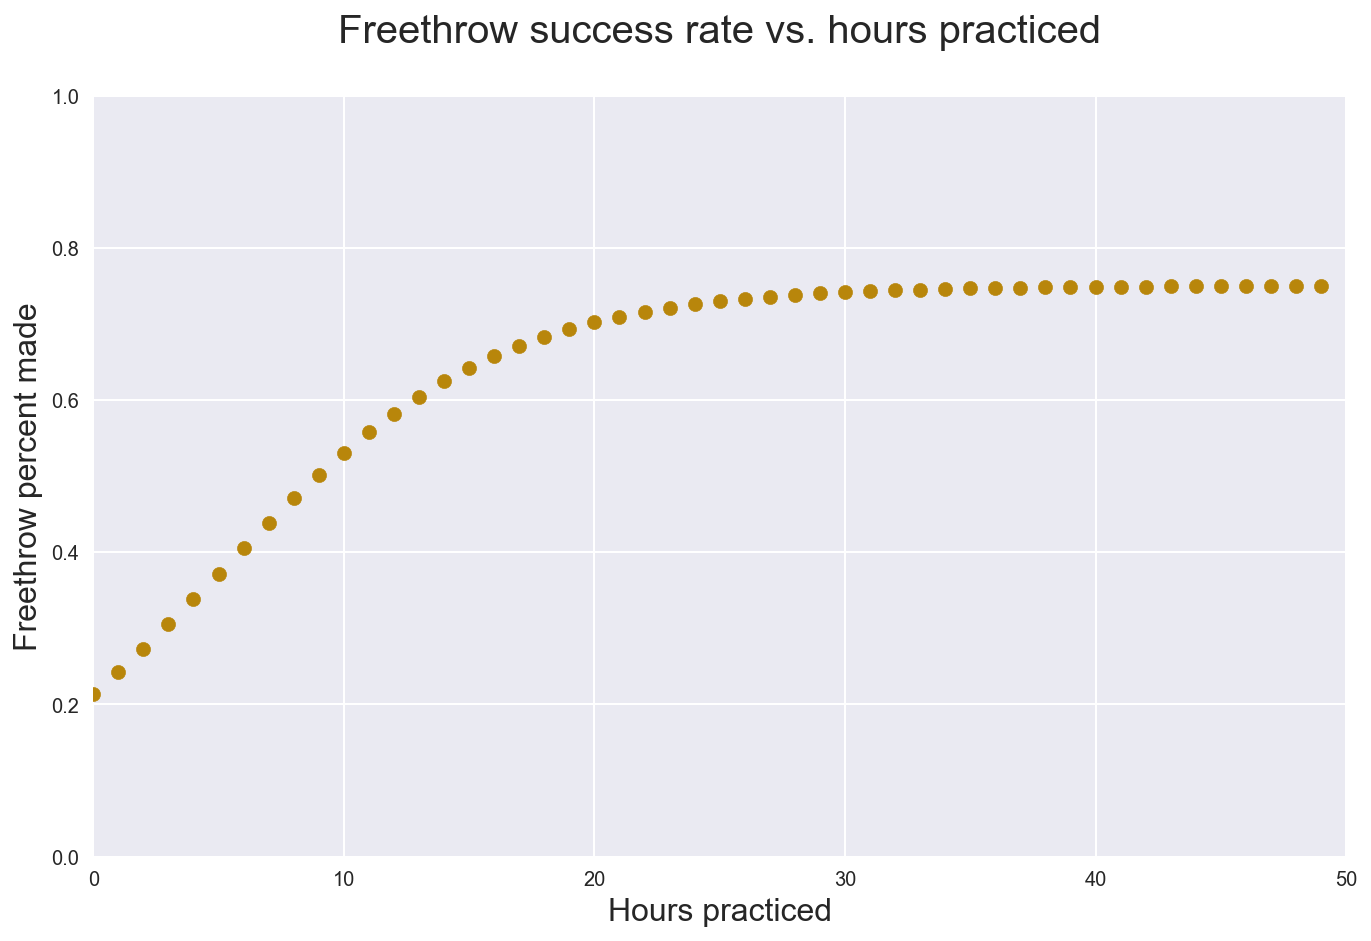

In [93]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()

ax.scatter(hours_practiced, freethrow_rate, color='darkgoldenrod', s=50)
ax.set_ylim([0,1])
ax.set_xlim([0,50])
ax.set_xlabel('Hours practiced', fontsize=16)
ax.set_ylabel('Freethrow percent made', fontsize=16)
ax.set_title('Freethrow success rate vs. hours practiced\n', fontsize=20)

plt.show()

What's the correlation between hours practiced and freethrow rate?

In [94]:
print(np.corrcoef(hours_practiced, freethrow_rate))

[[1.         0.84310254]
 [0.84310254 1.        ]]


It's a strong correlation, for sure, but you're also getting better and better consistently with each hour played, though not _as good_ as you did when you first started.

Spearman's rho is useful when you want a measure of correspondence for these kind of nonlinear relationships. In this example, spearman's rho is going to answer the question of the consistency in which you get better with practice, regardless of by how much.

In [95]:
# scipy.stats.rankdata will give you the ranks of the arrays
from scipy.stats import rankdata

def spearman_rho(X, Y):
    Xr = rankdata(X)
    print(Xr)
    Yr = rankdata(Y)
    print(Yr)
    return np.corrcoef(Xr, Yr)

In [96]:
print(spearman_rho(hours_practiced, freethrow_rate))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]
[[1. 1.]
 [1. 1.]]


Our rho = 1, indicating that every time hours_practiced increases, freethrow_rate also increases.

In our case of verbal and math scores:

In [97]:
from scipy.stats import spearmanr

In [98]:
print('Pearson:')
print(np.corrcoef(sat.Verbal,sat.Math)[0,1])

print('Spearman:')
print(spearmanr(sat.Verbal,sat.Math).correlation)

Pearson:
0.8999093181811048
Spearman:
0.9094125143903472


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [99]:
rate = sat.Rate

# scipy.stats.percentileofscore gives you percentiles for an array
# the kind=“weak” argument means a percentileofscore of a value indicates
# the percent of values that are less than or equal to the provided score.
from scipy.stats import percentileofscore
from scipy.stats import spearmanr

rate_pctl = np.array([percentileofscore(rate, r, kind='weak') for r in rate])
print(rate.values)
print(rate_pctl)

sat['Rate_pctl'] = rate_pctl
print('Californias rate percentile:', sat.loc[(sat.State == 'CA'), 'Rate_pctl'].values)

[82 81 79 77 72 71 71 69 69 68 67 65 65 63 60 57 56 55 54 53 53 52 51 51
 34 33 31 26 23 18 17 13 13 12 12 11 11  9  9  9  8  8  8  7  6  6  5  5
  4  4  4]
[100.          98.03921569  96.07843137  94.11764706  92.15686275
  90.19607843  90.19607843  86.2745098   86.2745098   82.35294118
  80.39215686  78.43137255  78.43137255  74.50980392  72.54901961
  70.58823529  68.62745098  66.66666667  64.70588235  62.74509804
  62.74509804  58.82352941  56.8627451   56.8627451   52.94117647
  50.98039216  49.01960784  47.05882353  45.09803922  43.1372549
  41.17647059  39.21568627  39.21568627  35.29411765  35.29411765
  31.37254902  31.37254902  27.45098039  27.45098039  27.45098039
  21.56862745  21.56862745  21.56862745  15.68627451  13.7254902
  13.7254902    9.80392157   9.80392157   5.88235294   5.88235294
   5.88235294]
Californias rate percentile: [56.8627451]


Percentiles of an array (with this definition) convert the numbers into a value that represents the percentage of the other values in the array that are less than or equal to the current value.

Spearman's rho is computing the correlations between the ranks of two variables. Percentiles are a ranking of the numbers as well. I've added a handful of massive outliers to the rate.

Compare:

- cor(rate_rank, rate_values)
- rho(rate_rank, rate_values)
- cor(rate_rank, rate_pctl)
- rho(rate_rank, rate_pctl

In [100]:
sat_rate_outliers = np.array(list(sat.Rate.values) + [199., 1990., 4999., -10002.])

print('Original values:')
print(np.corrcoef(rankdata(sat_rate_outliers), sat_rate_outliers))
print(spearmanr(rankdata(sat_rate_outliers), sat_rate_outliers))

print('\nPercentile values:')
rate_outlier_pctl = np.array([percentileofscore(sat_rate_outliers, r, kind='weak') for r in sat_rate_outliers])
print(np.corrcoef(rankdata(sat_rate_outliers), rate_outlier_pctl))
print(spearmanr(rankdata(sat_rate_outliers), rate_outlier_pctl))

Original values:
[[1.         0.35878474]
 [0.35878474 1.        ]]
SpearmanrResult(correlation=1.0, pvalue=0.0)

Percentile values:
[[1.         0.99981687]
 [0.99981687 1.        ]]
SpearmanrResult(correlation=1.0, pvalue=0.0)


Correlations between the ranks and the percentiles are nearly perfect. Outliers no longer affect pearson's r strongly. You can see too that Spearman's rho is the same for both (because, like percentiles, it is using ranks).

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.

**1.**

Percentile scoring is a hammer when it comes to outliers. As the example showed above, you can "fix" your pearson's r when you have outliers by converting to percentiles. The downside to this is the same reason why it works: you've removed information about the variance of your values.

**2. Plot of hallucinogen frequency of use distribution**

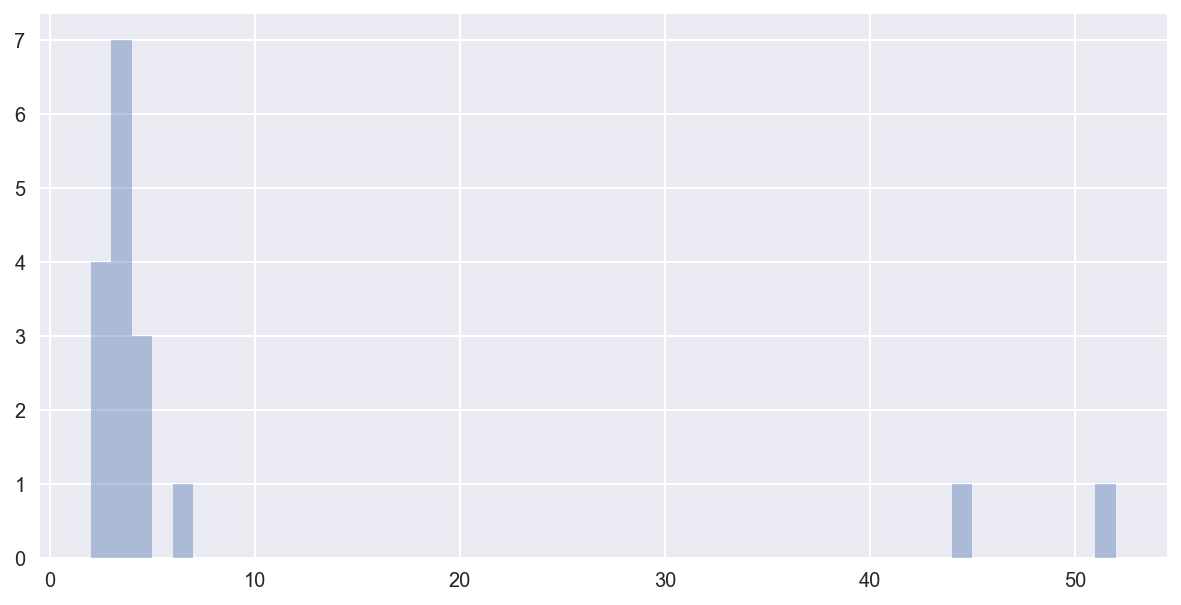

In [101]:
fig = plt.figure(figsize=(9,5))
ax = fig.gca()

hal = drug_freq.hallucinogen.values

sns.distplot(hal, kde=False, ax=ax)
plt.show()

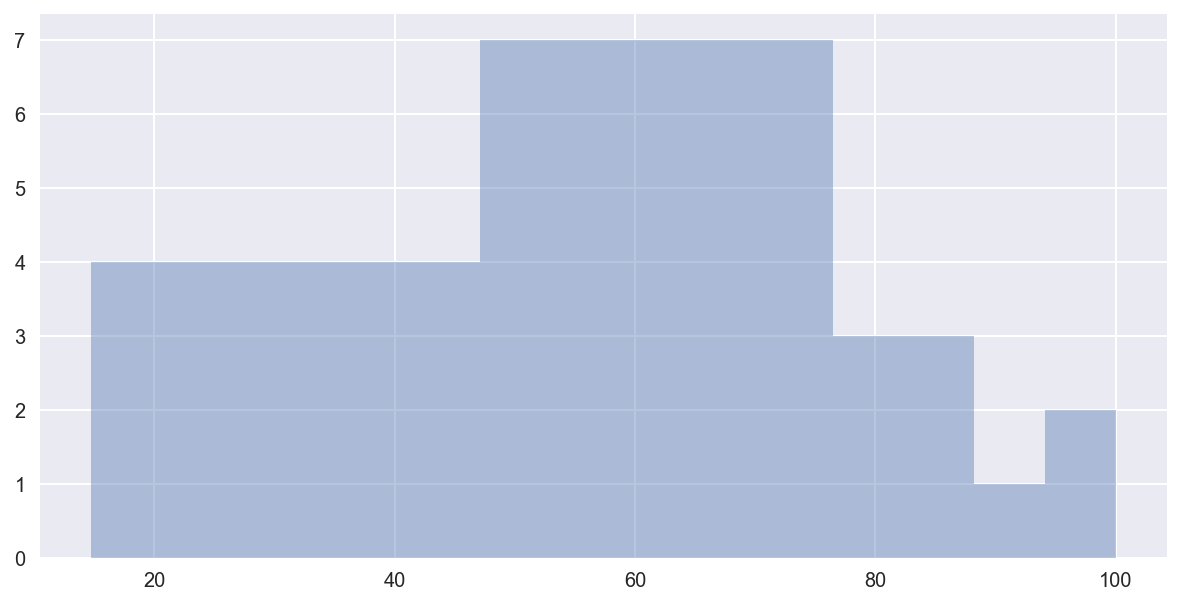

In [102]:
fig = plt.figure(figsize=(9,5))
ax = fig.gca()

hal_pctl = np.array([percentileofscore(hal, h) for h in hal])

sns.distplot(hal_pctl, kde=False, ax=ax, bins=sorted(hal_pctl))
plt.show()


They aren't totally uniform, because we have ties:

In [103]:
hal_pctl

array([100.        ,  88.23529412,  47.05882353,  76.47058824,
        47.05882353,  47.05882353,  76.47058824,  47.05882353,
        14.70588235,  76.47058824,  47.05882353,  14.70588235,
        47.05882353,  14.70588235,  47.05882353,  94.11764706,
        14.70588235])

Percentile scoring restricts the range from 0 to 100. It also, in doing so, eliminates extreme skewness found in the original variable's chart.